# Dive into Deep Learning - PyTorch

## 3.1 线性回归

线性回归输出是一个连续值，因此适用于回归问题。回归问题在实际中很常见，如预测房屋价格、气温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是一个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。softmax回归则适用于分类问题。

由于线性回归和softmax回归都是单层神经网络，它们涉及的概念和技术同样适用于大多数的深度学习模型。我们首先以线性回归为例，介绍大多数深度学习模型的基本要素和表示方法。


### 3.1.1 线性回归的基本要素

我们以一个简单的房屋价格预测作为例子来解释线性回归的基本要素。这个应用的目标是预测一栋房子的售出价格（元）。我们知道这个价格取决于很多因素，如房屋状况、地段、市场行情等。为了简单起见，这里我们假设价格只取决于房屋状况的两个因素，即面积（平方米）和房龄（年）。接下来我们希望探索价格与这两个因素的具体关系。

### 3.1.1.1 模型定义

设房屋的面积为 $x_1$，房龄为 $x_2$，售出价格为 $y$。我们需要建立基于输入 $x_1$ 和 $x_2$ 来计算输出 $y$ 的表达式，也就是模型（model）。顾名思义，线性回归假设输出与各个输入之间是线性关系：
$$
\hat{y} = x_1 w_1 + x_2 w_2 + b
$$
其中 $w_1$ 和 $w_2$ 是权重（weight），$b$ 是偏差（bias），且均为标量。它们是线性回归模型的参数（parameter）。模型输出 $\hat{y}$ 是线性回归对真实价格 $y$ 的预测或估计。我们通常允许它们之间有一定误差。


### 3.1.1.2 模型训练

接下来我们需要通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练（model training）。下面我们介绍模型训练所涉及的3个要素。

#### (1) 训练数据
我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）。特征用来表征样本的特点。

假设我们采集的样本数为 $n$，索引为 $i$ 的样本的特征为 $x_1^{(i)}$ 和 $x_2^{(i)}$，标签为 $y^{(i)}$。对于索引为 $i$ 的房屋，线性回归模型的房屋价格预测表达式为
$$
\hat{y}^{(i)} = x_1^{(i)} w_1 + x_2^{(i)} w_2 + b
$$

#### (2) 损失函数

在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它在评估索引为 $i$ 的样本误差的表达式为

$$\ell^{(i)}(w_1, w_2, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

其中常数 $\frac 1 2$ 使对平方项求导后的常数系数为1，这样在形式上稍微简单一些。显然，误差越小表示预测价格与真实价格越相近，且当二者相等时误差为0。给定训练数据集，这个误差只与模型参数相关，因此我们将它记为以模型参数为参数的函数。在机器学习里，将衡量误差的函数称为损失函数（loss function）。这里使用的平方误差函数也称为平方损失（square loss）。

通常，我们用训练数据集中所有样本误差的平均来衡量模型预测的质量，即

$$
\ell(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \ell^{(i)}(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right)^2
$$

在模型训练中，我们希望找出一组模型参数，记为 $w_1^*, w_2^*, b^*$，来使训练样本平均损失最小：

$$
w_1^*, w_2^*, b^* = \underset{w_1, w_2, b}{\arg\min} \ell(w_1, w_2, b)
$$


#### (3) 优化算法

当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch）$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。

在训练本节讨论的线性回归模型的过程中，模型的每个参数将作如下迭代：

$$
\begin{aligned}
w_1 &\leftarrow w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_1} = w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_1^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
w_2 &\leftarrow w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_2} = w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_2^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
b &\leftarrow b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial b} = b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right).
\end{aligned}
$$

在上式中，$|\mathcal{B}|$ 代表每个小批量中的样本个数（批量大小，batch size），$\eta$ 称作学习率（learning rate）并取正数。需要强调的是，这里的批量大小和学习率的值是人为设定的，并不是通过模型训练学出的，因此叫作超参数（hyperparameter）。我们通常所说的“调参”指的正是调节超参数，例如通过反复试错来找到超参数合适的值。在少数情况下，超参数也可以通过模型训练学出。本书对此类情况不做讨论。

### 3.1.1.3 模型预测
模型训练完成后，我们将模型参数 $w_1, w_2, b$ 在优化算法停止时的值分别记作 $\hat{w}_1, \hat{w}_2, \hat{b}$。注意，这里我们得到的并不一定是最小化损失函数的最优解 $w_1^*, w_2^*, b^*$，而是对最优解的一个近似。然后，我们就可以使用学出的线性回归模型 $x_1 \hat{w}_1 + x_2 \hat{w}_2 + \hat{b}$ 来估算训练数据集以外任意一栋面积（平方米）为$x_1$、房龄（年）为$x_2$的房屋的价格了。这里的估算也叫作模型预测、模型推断或模型测试。


### 3.1.2 线性回归的表示方法

我们已经阐述了线性回归的模型表达式、训练和预测。下面我们解释线性回归与神经网络的联系，以及线性回归的矢量计算表达式。

### 3.1.2.1 神经网络图

在深度学习中，我们可以使用神经网络图直观地表现模型结构。为了更清晰地展示线性回归作为神经网络的结构，图3.1使用神经网络图表示本节中介绍的线性回归模型。神经网络图隐去了模型参数权重和偏差。

<div align=center>
<img width="250" src="./img/chapter03/3.1_linreg.svg"/>
</div>
<div align=center>图3.1 线性回归是一个单层神经网络</div>


在图3.1所示的神经网络中，输入分别为 $x_1$ 和 $x_2$，因此输入层的输入个数为2。输入个数也叫特征数或特征向量维度。图3.1中网络的输出为 $o$，输出层的输出个数为1。需要注意的是，我们直接将图3.1中神经网络的输出 $o$ 作为线性回归的输出，即 $\hat{y} = o$。由于输入层并不涉及计算，按照惯例，图3.1所示的神经网络的层数为1。所以，线性回归是一个单层神经网络。输出层中负责计算 $o$ 的单元又叫神经元。在线性回归中，$o$ 的计算依赖于 $x_1$ 和 $x_2$。也就是说，输出层中的神经元和输入层中各个输入完全连接。因此，这里的输出层又叫全连接层（fully-connected layer）或稠密层（dense layer）。


### 3.1.2.2 矢量计算表达式

在模型训练或预测时，我们常常会同时处理多个数据样本并用到矢量计算。在介绍线性回归的矢量计算表达式之前，让我们先考虑对两个向量相加的两种方法。a

下面先定义两个1000维的向量。
``` python
import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)
```

向量相加的一种方法是，将这两个向量按元素逐一做标量加法。
``` python
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)
```
输出：
```
0.02039504051208496
```

向量相加的另一种方法是，将这两个向量直接做矢量加法。

``` python
start = time()
d = a + b
print(time() - start)
```
输出：
```
0.0008330345153808594
```

结果很明显，后者比前者更省时。因此，我们应该尽可能采用矢量计算，以提升计算效率。

让我们再次回到本节的房价预测问题。如果我们对训练数据集里的3个房屋样本（索引分别为1、2和3）逐一预测价格，将得到
$$
\begin{aligned}
\hat{y}^{(1)} &= x_1^{(1)} w_1 + x_2^{(1)} w_2 + b,\\
\hat{y}^{(2)} &= x_1^{(2)} w_1 + x_2^{(2)} w_2 + b,\\
\hat{y}^{(3)} &= x_1^{(3)} w_1 + x_2^{(3)} w_2 + b.
\end{aligned}
$$

现在，我们将上面3个等式转化成矢量计算。设

$$
\boldsymbol{\hat{y}} =
\begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \hat{y}^{(3)}
\end{bmatrix},\quad
\boldsymbol{X} =
\begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} \\
    x_1^{(2)} & x_2^{(2)} \\
    x_1^{(3)} & x_2^{(3)}
\end{bmatrix},\quad
\boldsymbol{w} =
\begin{bmatrix}
    w_1 \\
    w_2
\end{bmatrix}
$$

对3个房屋样本预测价格的矢量计算表达式为$\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{w} + b,$ 其中的加法运算使用了广播机制（参见2.2节）。例如：

``` python
a = torch.ones(3)
b = 10
print(a + b)
```
输出：
```
tensor([11., 11., 11.])
```

广义上讲，当数据样本数为 $n$，特征数为 $d$ 时，线性回归的矢量计算表达式为
$$
\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{w} + b
$$
其中模型输出 $\boldsymbol{\hat{y}} \in \mathbb{R}^{n \times 1}$ 批量数据样本特征 $\boldsymbol{X} \in \mathbb{R}^{n \times d}$，权重 $\boldsymbol{w} \in \mathbb{R}^{d \times 1}$， 偏差 $b \in \mathbb{R}$。相应地，批量数据样本标签 $\boldsymbol{y} \in \mathbb{R}^{n \times 1}$。设模型参数 $\boldsymbol{\theta} = [w_1, w_2, b]^\top$，我们可以重写损失函数为
$$
\ell(\boldsymbol{\theta})=\frac{1}{2n}(\boldsymbol{\hat{y}}-\boldsymbol{y})^\top(\boldsymbol{\hat{y}}-\boldsymbol{y})
$$

小批量随机梯度下降的迭代步骤将相应地改写为
$$
\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}   \nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta}),
$$

其中梯度是损失有关3个为标量的模型参数的偏导数组成的向量：
$$
\nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta})=
\begin{bmatrix}
    \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_1} \\
    \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_2} \\
    \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial b}
\end{bmatrix} =
\begin{bmatrix}
    x_1^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \\
    x_2^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \\
    x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}
\end{bmatrix}=
\begin{bmatrix}
    x_1^{(i)} \\
    x_2^{(i)} \\
    1
\end{bmatrix}
(\hat{y}^{(i)} - y^{(i)})
$$

## 3.2 线性回归的从零开始实现

In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

### 3.2.1 手工编造数据集：

$$\boldsymbol y = \boldsymbol X \boldsymbol w + b + \epsilon$$

$\epsilon \sim \mathcal N(\mu = 0, \sigma = 0.01)$

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

features[0], labels[0]

(tensor([1.8370, 1.6896]), tensor(2.1210))

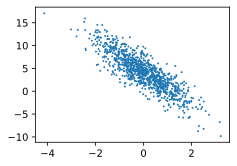

In [3]:
# 设置使用svg显示
def use_svg_display():
    display.set_matplotlib_formats('svg')

# 设置图片大小
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

# 作图
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

### 3.2.2 读取数据

这里直接用到了Mini-Batch，需要注意

In [4]:
def  data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机顺序读取
    random.shuffle(indices)
    # range(start, stop[, step])
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后可能不足一个batch
        yield features.index_select(0, j), labels.index_select(0, j) #  yeild 其实就是返回一个list

In [5]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break # 只输出第一组

tensor([[-1.5063, -1.5556],
        [-0.0363, -0.8244],
        [ 0.7967, -0.2169],
        [ 2.1448,  0.3774],
        [-1.5362, -0.1575],
        [-2.4306,  1.4704],
        [-1.2490, -1.6936],
        [ 0.4871, -0.5220],
        [ 0.5379,  1.2286],
        [-1.0028,  0.4617]]) tensor([ 6.4695,  6.9465,  6.5182,  7.2140,  1.6619, -5.6534,  7.4483,  6.9413,
         1.0962,  0.6225])


### 3.2.3 初始化模型参数

In [6]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True) # inplace
b.requires_grad_(requires_grad=True) # inplace

w, b

(tensor([[0.0023],
         [0.0042]], requires_grad=True),
 tensor([0.], requires_grad=True))

### 3.2.4 定义模型

In [7]:
def linreg(X, w, b):
        return torch.mm(X, w) + b

### 3.2.5 定义损失函数

In [8]:
def squared_loss(y_hat, y):
    # 注：这里返回的是向量，而且pytorch的MSELoss并没有除以2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

### 3.2.6 定义优化算法（Mini-Batch 随机梯度下降）

In [9]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改时要用param.data

### 3.2.7 训练模型

In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward() # 求梯度
        sgd([w, b], lr, batch_size)
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item())) # item 是只返回一个值

epoch 1, loss 0.038993
epoch 2, loss 0.000148
epoch 3, loss 0.000050


In [11]:
print("true_w: ", true_w, "\n     w: ", w)
print("true_b: ", true_w, "\n     b: ", w)

true_w:  [2, -3.4] 
     w:  tensor([[ 1.9995],
        [-3.3996]], requires_grad=True)
true_b:  [2, -3.4] 
     b:  tensor([[ 1.9995],
        [-3.3996]], requires_grad=True)


## 3.3 线性回归的简洁实现

### 3.3.1 生成数据集

和上面一样

### 3.3.2 读取数据

In [12]:
import torch.utils.data as Data

batch_size = 10
dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

data_iter

In [13]:
for X, y in data_iter:
    print(X, y)
    break # 只输出第一组

tensor([[ 0.0714, -0.5109],
        [-0.1075,  0.5388],
        [-0.2432,  1.1752],
        [ 1.0007, -1.2800],
        [ 0.4880, -1.0260],
        [-0.6226,  1.3949],
        [ 1.3000,  0.3358],
        [-0.6390,  0.4242],
        [ 2.2819, -0.8662],
        [-0.2025,  2.2689]]) tensor([ 6.0621,  2.1708, -0.2751, 10.5548,  8.6571, -1.7855,  5.6648,  1.4905,
        11.7033, -3.9205])


### 3.3.3 定义模型
用`torch.nn`模块

In [14]:
import torch.nn as nn

# 写法1
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    
    # forward 前向传播
    def forward(self, y):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)

net

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [15]:
# 写法2
net = nn.Sequential(
        nn.Linear(num_inputs, 1)
    )
net

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [16]:
# 写法3
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))

net

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [17]:
# x写法4
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
    ('linear', nn.Linear(num_inputs, 1))
]))

net

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [18]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[0.3878, 0.0901]], requires_grad=True)
Parameter containing:
tensor([0.1889], requires_grad=True)


### 3.3.4 初始化模型参数

In [19]:
from torch.nn import init

init.normal_(net[0].weight, mean = 0, std = 0.01)
init.constant_(net[0].bias, val = 0)

for param in net.parameters():
    print(param)

Parameter containing:
tensor([[0.0023, 0.0012]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


### 3.3.5 定义损失函数

In [20]:
loss = nn.MSELoss()

### 3.3.6 定义优化算法

In [21]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr = 0.03)

optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)

动态调整learning rate：

In [22]:
# 调整学习率

run_this_code = False

if run_this_code:
    for param_group in optimizer.param_groups:
        param_group['lr'] *= 0.1 # 学习率为之前的0.1倍

### 3.3.7 训练模型

In [23]:
num_epoch = 3
for epoch in range(1, num_epoch + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch %d, loss %f" % (epoch, l.item()))

epoch 1, loss 0.000182
epoch 2, loss 0.000094
epoch 3, loss 0.000087


In [24]:
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 2.0000, -3.4002]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2005], requires_grad=True)


# 3.4 softmax回归

前几节介绍的线性回归模型适用于输出为连续值的情景。在另一类情景中，模型输出可以是一个像图像类别这样的离散值。对于这样的离散值预测问题，我们可以使用诸如softmax回归在内的分类模型。和线性回归不同，softmax回归的输出单元从一个变成了多个，且引入了softmax运算使输出更适合离散值的预测和训练。本节以softmax回归模型为例，介绍神经网络中的分类模型。


## 3.4.1 分类问题

让我们考虑一个简单的图像分类问题，其输入图像的高和宽均为2像素，且色彩为灰度。这样每个像素值都可以用一个标量表示。我们将图像中的4像素分别记为$x_1, x_2, x_3, x_4$。假设训练数据集中图像的真实标签为狗、猫或鸡（假设可以用4像素表示出这3种动物），这些标签分别对应离散值$y_1, y_2, y_3$。

我们通常使用离散的数值来表示类别，例如$y_1=1, y_2=2, y_3=3$。如此，一张图像的标签为1、2和3这3个数值中的一个。虽然我们仍然可以使用回归模型来进行建模，并将预测值就近定点化到1、2和3这3个离散值之一，但这种连续值到离散值的转化通常会影响到分类质量。因此我们一般使用更加适合离散值输出的模型来解决分类问题。

## 3.4.2 softmax回归模型

softmax回归跟线性回归一样将输入特征与权重做线性叠加。与线性回归的一个主要不同在于，softmax回归的输出值个数等于标签里的类别数。因为一共有4种特征和3种输出动物类别，所以权重包含12个标量（带下标的$w$）、偏差包含3个标量（带下标的$b$），且对每个输入计算$o_1, o_2, o_3$这3个输出：

$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{21} + x_3 w_{31} + x_4 w_{41} + b_1,\\
o_2 &= x_1 w_{12} + x_2 w_{22} + x_3 w_{32} + x_4 w_{42} + b_2,\\
o_3 &= x_1 w_{13} + x_2 w_{23} + x_3 w_{33} + x_4 w_{43} + b_3.
\end{aligned}
$$


图3.2用神经网络图描绘了上面的计算。softmax回归同线性回归一样，也是一个单层神经网络。由于每个输出$o_1, o_2, o_3$的计算都要依赖于所有的输入$x_1, x_2, x_3, x_4$，softmax回归的输出层也是一个全连接层。

<div align=center>
<img width="350" src="./img/chapter03/3.4_softmaxreg.svg"/>
</div>
<div align=center> 图3.2 softmax回归是一个单层神经网络</div>


既然分类问题需要得到离散的预测输出，一个简单的办法是将输出值$o_i$当作预测类别是$i$的置信度，并将值最大的输出所对应的类作为预测输出，即输出 $\underset{i}{\arg\max} o_i$。例如，如果$o_1,o_2,o_3$分别为$0.1,10,0.1$，由于$o_2$最大，那么预测类别为2，其代表猫。

然而，直接使用输出层的输出有两个问题。一方面，由于输出层的输出值的范围不确定，我们难以直观上判断这些值的意义。例如，刚才举的例子中的输出值10表示“很置信”图像类别为猫，因为该输出值是其他两类的输出值的100倍。但如果$o_1=o_3=10^3$，那么输出值10却又表示图像类别为猫的概率很低。另一方面，由于真实标签是离散值，这些离散值与不确定范围的输出值之间的误差难以衡量。

softmax运算符（softmax operator）解决了以上两个问题。它通过下式将输出值变换成值为正且和为1的概率分布：

$$
\hat{y}_1, \hat{y}_2, \hat{y}_3 = \text{softmax}(o_1, o_2, o_3)
$$

其中

$$
\hat{y}_1 = \frac{ \exp(o_1)}{\sum_{i=1}^3 \exp(o_i)},\quad
\hat{y}_2 = \frac{ \exp(o_2)}{\sum_{i=1}^3 \exp(o_i)},\quad
\hat{y}_3 = \frac{ \exp(o_3)}{\sum_{i=1}^3 \exp(o_i)}.
$$

容易看出$\hat{y}_1 + \hat{y}_2 + \hat{y}_3 = 1$且$0 \leq \hat{y}_1, \hat{y}_2, \hat{y}_3 \leq 1$，因此$\hat{y}_1, \hat{y}_2, \hat{y}_3$是一个合法的概率分布。这时候，如果$\hat{y}_2=0.8$，不管$\hat{y}_1$和$\hat{y}_3$的值是多少，我们都知道图像类别为猫的概率是80%。此外，我们注意到

$$
\underset{i}{\arg\max} o_i = \underset{i}{\arg\max} \hat{y}_i
$$

因此softmax运算不改变预测类别输出。

## 3.4.3 单样本分类的矢量计算表达式

为了提高计算效率，我们可以将单样本分类通过矢量计算来表达。在上面的图像分类问题中，假设softmax回归的权重和偏差参数分别为

$$
\boldsymbol{W} = 
\begin{bmatrix}
    w_{11} & w_{12} & w_{13} \\
    w_{21} & w_{22} & w_{23} \\
    w_{31} & w_{32} & w_{33} \\
    w_{41} & w_{42} & w_{43}
\end{bmatrix},\quad
\boldsymbol{b} = 
\begin{bmatrix}
    b_1 & b_2 & b_3
\end{bmatrix},
$$

设高和宽分别为2个像素的图像样本$i$的特征为

$$\boldsymbol{x}^{(i)} = \begin{bmatrix}x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & x_4^{(i)}\end{bmatrix},$$

输出层的输出为

$$\boldsymbol{o}^{(i)} = \begin{bmatrix}o_1^{(i)} & o_2^{(i)} & o_3^{(i)}\end{bmatrix},$$

预测为狗、猫或鸡的概率分布为

$$\boldsymbol{\hat{y}}^{(i)} = \begin{bmatrix}\hat{y}_1^{(i)} & \hat{y}_2^{(i)} & \hat{y}_3^{(i)}\end{bmatrix}.$$


softmax回归对样本$i$分类的矢量计算表达式为

$$
\begin{aligned}
\boldsymbol{o}^{(i)} &= \boldsymbol{x}^{(i)} \boldsymbol{W} + \boldsymbol{b},\\
\boldsymbol{\hat{y}}^{(i)} &= \text{softmax}(\boldsymbol{o}^{(i)}).
\end{aligned}
$$

## 3.4.4 小批量样本分类的矢量计算表达式


为了进一步提升计算效率，我们通常对小批量数据做矢量计算。广义上讲，给定一个小批量样本，其批量大小为$n$，输入个数（特征数）为$d$，输出个数（类别数）为$q$。设批量特征为$\boldsymbol{X} \in \mathbb{R}^{n \times d}$。假设softmax回归的权重和偏差参数分别为$\boldsymbol{W} \in \mathbb{R}^{d \times q}$和$\boldsymbol{b} \in \mathbb{R}^{1 \times q}$。softmax回归的矢量计算表达式为

$$
\begin{aligned}
\boldsymbol{O} &= \boldsymbol{X} \boldsymbol{W} + \boldsymbol{b},\\
\boldsymbol{\hat{Y}} &= \text{softmax}(\boldsymbol{O}),
\end{aligned}
$$

其中的加法运算使用了广播机制，$\boldsymbol{O}, \boldsymbol{\hat{Y}} \in \mathbb{R}^{n \times q}$且这两个矩阵的第$i$行分别为样本$i$的输出$\boldsymbol{o}^{(i)}$和概率分布$\boldsymbol{\hat{y}}^{(i)}$。


## 3.4.5 交叉熵损失函数

前面提到，使用softmax运算后可以更方便地与离散标签计算误差。我们已经知道，softmax运算将输出变换成一个合法的类别预测分布。实际上，真实标签也可以用类别分布表达：对于样本$i$，我们构造向量$\boldsymbol{y}^{(i)}\in \mathbb{R}^{q}$ ，使其第$y^{(i)}$（样本$i$类别的离散数值）个元素为1，其余为0。这样我们的训练目标可以设为使预测概率分布$\boldsymbol{\hat y}^{(i)}$尽可能接近真实的标签概率分布$\boldsymbol{y}^{(i)}$。

我们可以像线性回归那样使用平方损失函数$\|\boldsymbol{\hat y}^{(i)}-\boldsymbol{y}^{(i)}\|^2/2$。然而，想要预测分类结果正确，我们其实并不需要预测概率完全等于标签概率。例如，在图像分类的例子里，如果$y^{(i)}=3$，那么我们只需要$\hat{y}^{(i)}_3$比其他两个预测值$\hat{y}^{(i)}_1$和$\hat{y}^{(i)}_2$大就行了。即使$\hat{y}^{(i)}_3$值为0.6，不管其他两个预测值为多少，类别预测均正确。而平方损失则过于严格，例如$\hat y^{(i)}_1=\hat y^{(i)}_2=0.2$比$\hat y^{(i)}_1=0, \hat y^{(i)}_2=0.4$的损失要小很多，虽然两者都有同样正确的分类预测结果。

改善上述问题的一个方法是使用更适合衡量两个概率分布差异的测量函数。其中，交叉熵（cross entropy）是一个常用的衡量方法：

$$H\left(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}\right ) = -\sum_{j=1}^q y_j^{(i)} \log \hat y_j^{(i)},$$

其中带下标的$y_j^{(i)}$是向量$\boldsymbol y^{(i)}$中非0即1的元素，需要注意将它与样本$i$类别的离散数值，即不带下标的$y^{(i)}$区分。在上式中，我们知道向量$\boldsymbol y^{(i)}$中只有第$y^{(i)}$个元素$y^{(i)}_{y^{(i)}}$为1，其余全为0，于是$H(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}) = -\log \hat y_{y^{(i)}}^{(i)}$。也就是说，交叉熵只关心对正确类别的预测概率，因为只要其值足够大，就可以确保分类结果正确。当然，遇到一个样本有多个标签时，例如图像里含有不止一个物体时，我们并不能做这一步简化。但即便对于这种情况，交叉熵同样只关心对图像中出现的物体类别的预测概率。


假设训练数据集的样本数为$n$，交叉熵损失函数定义为
$$\ell(\boldsymbol{\Theta}) = \frac{1}{n} \sum_{i=1}^n H\left(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}\right ),$$

其中$\boldsymbol{\Theta}$代表模型参数。同样地，如果每个样本只有一个标签，那么交叉熵损失可以简写成$\ell(\boldsymbol{\Theta}) = -(1/n)  \sum_{i=1}^n \log \hat y_{y^{(i)}}^{(i)}$。从另一个角度来看，我们知道最小化$\ell(\boldsymbol{\Theta})$等价于最大化$\exp(-n\ell(\boldsymbol{\Theta}))=\prod_{i=1}^n \hat y_{y^{(i)}}^{(i)}$，即最小化交叉熵损失函数等价于最大化训练数据集所有标签类别的联合预测概率。


### 3.4.6 模型预测及评价

在训练好softmax回归模型后，给定任一样本特征，就可以预测每个输出类别的概率。通常，我们把预测概率最大的类别作为输出类别。如果它与真实类别（标签）一致，说明这次预测是正确的。在3.6节的实验中，我们将使用准确率（accuracy）来评价模型的表现。它等于正确预测数量与总预测数量之比。

### 使用Softmax或者Sigmoid作为激活函数的原因

这本书上来就给出了Softmax函数，但并未解释为什么。在吴恩达机的斯坦福公开课上（CS229），就讲到过这个原因。我们忽略了一个比较重要的假设，就是其实这些出现的概率我们都是假设他们服从正态分布，才有了接下来一系列的东西。从概率角度上看，我们确定了服从的分布，然后才推导出了归一化的函数形式，我们称之为Softmax函数，其他的好处，比如容易训练，比如交叉熵损失函数，都是其带来的好处，这里引用知乎网友的一句话：

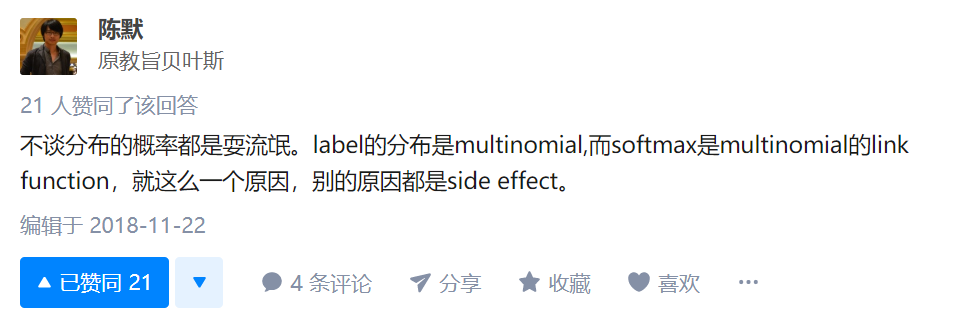

## 3.5 图像分类数据集（Fashion-MNIST）

在介绍softmax回归的实现前我们先引入一个多类图像分类数据集。它将在后面的章节中被多次使用，以方便我们观察比较算法之间在模型精度和计算效率上的区别。图像分类数据集中最常用的是手写数字识别数据集MNIST[1]。但大部分模型在MNIST上的分类精度都超过了95%。为了更直观地观察算法之间的差异，我们将使用一个图像内容更加复杂的数据集Fashion-MNIST[2]（这个数据集也比较小，只有几十M，没有GPU的电脑也能吃得消）。

本节我们将使用torchvision包，它是服务于PyTorch深度学习框架的，主要用来构建计算机视觉模型。torchvision主要由以下几部分构成：
1. `torchvision.datasets`: 一些加载数据的函数及常用的数据集接口；
2. `torchvision.models`: 包含常用的模型结构（含预训练模型），例如AlexNet、VGG、ResNet等；
3. `torchvision.transforms`: 常用的图片变换，例如裁剪、旋转等；
4. `torchvision.utils`: 其他的一些有用的方法。

### 3.5.1 获取数据集

首先导入本节需要的包或模块。

In [25]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys

下面，我们通过torchvision的`torchvision.datasets`来下载这个数据集。第一次调用时会自动从网上获取数据。我们通过参数`train`来指定获取训练数据集或测试数据集（testing data set）。测试数据集也叫测试集（testing set），只用来评价模型的表现，并不用来训练模型。

另外我们还指定了参数`transform = transforms.ToTensor()`使所有数据转换为`Tensor`，如果不进行转换则返回的是PIL图片。`transforms.ToTensor()`将尺寸为 (H x W x C) 且数据位于[0, 255]的PIL图片或者数据类型为`np.uint8`的NumPy数组转换为尺寸为(C x H x W)且数据类型为`torch.float32`且位于[0.0, 1.0]的`Tensor`。
> 注意： 由于像素值为0到255的整数，所以刚好是uint8所能表示的范围，包括`transforms.ToTensor()`在内的一些关于图片的函数就默认输入的是uint8型，若不是，可能不会报错但可能得不到想要的结果。所以，**如果用像素值(0-255整数)表示图片数据，那么一律将其类型设置成uint8，避免不必要的bug。** `本人`(译者)就被这点坑过，详见[我的这个博客2.2.4节](https://tangshusen.me/2018/12/05/kaggle-doodle-reco/)。


In [26]:
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

上面的`mnist_train`和`mnist_test`都是[`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html)的子类，所以我们可以用`len()`来获取该数据集的大小，还可以用下标来获取具体的一个样本。训练集中和测试集中的每个类别的图像数分别为6,000和1,000。因为有10个类别，所以训练集和测试集的样本数分别为60,000和10,000。

In [27]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [28]:
feature, label = mnist_train[0]
print(feature.shape, label)

torch.Size([1, 28, 28]) 9


变量`feature`对应高和宽均为28像素的图像。由于我们使用了`transforms.ToTensor()`，所以每个像素的数值为[0.0, 1.0]的32位浮点数。需要注意的是，`feature`的尺寸是 (C x H x W) 的，而不是 (H x W x C)。第一维是通道数，因为数据集中是灰度图像，所以通道数为1。后面两维分别是图像的高和宽。


Fashion-MNIST中一共包括了10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。以下函数可以将数值标签转成相应的文本标签。

In [29]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouses', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [30]:
def show_fashion_mnist(images, labels):
    use_svg_display()
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

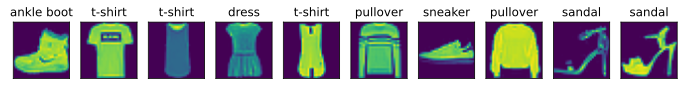

In [31]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

## 3.5.2 读取小批量

我们将在训练数据集上训练模型，并将训练好的模型在测试数据集上评价模型的表现。前面说过，`mnist_train`是`torch.utils.data.Dataset`的子类，所以我们可以将其传入`torch.utils.data.DataLoader`来创建一个读取小批量数据样本的DataLoader实例。

在实践中，数据读取经常是训练的性能瓶颈，特别当模型较简单或者计算硬件性能较高时。PyTorch的`DataLoader`中一个很方便的功能是允许使用多进程来加速数据读取。这里我们通过参数`num_workers`来设置4个进程读取数据。


In [32]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

我们将获取并读取Fashion-MNIST数据集的逻辑封装在`d2lzh_pytorch.load_data_fashion_mnist`函数中供后面章节调用。该函数将返回`train_iter`和`test_iter`两个变量。随着本书内容的不断深入，我们会进一步改进该函数。它的完整实现将在5.6节中描述。

最后我们查看读取一遍训练数据需要的时间。

In [33]:
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

3.09 sec


## 3.6 Softmax 回归的从零开始实现

In [34]:
import torch
import torchvision
import numpy as np
import sys

### 3.6.1 获取和读取数据
在之前已经完成，用的是`train_iter, test_iter`

### 3.6.2 初始化模型参数

跟线性回归中的例子一样，我们将使用向量表示每个样本。已知每个样本输入是高和宽均为28像素的图像。模型的输入向量的长度是 $28 \times 28 = 784$：该向量的每个元素对应图像中每个像素。由于图像有10个类别，单层神经网络输出层的输出个数为10，因此softmax回归的权重和偏差参数分别为$784 \times 10$和$1 \times 10$的矩阵。


In [35]:
num_inputs = 784 # 28 * 28
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype = torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)

In [36]:
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

W, b

(tensor([[-0.0081,  0.0007,  0.0028,  ...,  0.0040,  0.0018, -0.0002],
         [ 0.0059,  0.0101,  0.0116,  ..., -0.0036,  0.0026,  0.0078],
         [ 0.0036, -0.0042,  0.0003,  ..., -0.0158, -0.0038,  0.0067],
         ...,
         [-0.0045, -0.0034, -0.0097,  ...,  0.0089, -0.0028,  0.0126],
         [ 0.0026, -0.0124,  0.0152,  ...,  0.0052, -0.0015,  0.0204],
         [-0.0003, -0.0035, -0.0080,  ...,  0.0106,  0.0066,  0.0026]],
        requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))

### 3.6.3 实现Softmax运算
在介绍如何定义softmax回归之前，我们先描述一下对如何对多维`Tensor`按维度操作。在下面的例子中，给定一个`Tensor`矩阵`X`。我们可以只对其中同一列（`dim=0`）或同一行（`dim=1`）的元素求和，并在结果中保留行和列这两个维度（`keepdim=True`）。

In [37]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X.sum(dim=0, keepdim=True))
print(X.sum(dim=1, keepdim=True))

tensor([[5, 7, 9]])
tensor([[ 6],
        [15]])


In [38]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition

In [39]:
X = torch.rand((2, 5))
X_prob = softmax(X)
print(X_prob, X_prob.sum(dim=1))

tensor([[0.2122, 0.1220, 0.2151, 0.2333, 0.2173],
        [0.2237, 0.1917, 0.2394, 0.1978, 0.1474]]) tensor([1.0000, 1.0000])


### 3.6.4 定义模型

有了softmax运算，我们可以定义上节描述的softmax回归模型了。这里通过`view`函数将每张原始图像改成长度为`num_inputs`的向量。

In [40]:
def net(X):
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)

### 3.6.5 定义损失函数

In [41]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1, 1)))

### 3.6.6 计算分类准确率
上一节中，我们介绍了softmax回归使用的交叉熵损失函数。为了得到标签的预测概率，我们可以使用`gather`函数。在下面的例子中，变量`y_hat`是2个样本在3个类别的预测概率，变量`y`是这2个样本的标签类别。通过使用`gather`函数，我们得到了2个样本的标签的预测概率。与3.4节（softmax回归）数学表述中标签类别离散值从1开始逐一递增不同，在代码中，标签类别的离散值是从0开始逐一递增的。

In [42]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [43]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0.0
    for X, y in data_iter:
        acc_sum+= (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [44]:
print(evaluate_accuracy(test_iter, net))

0.1227


### 3.6.7 训练模型

In [45]:
num_epochs, lr = 5, 0.1
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0.0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            
            l.backward()
            
            if optimizer is None:
                sgd(params, lr, batch_size)
            else:
                optimizer.step()
                
                
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss 0.7838, train acc 0.751, test acc 0.780
epoch 2, loss 0.5709, train acc 0.812, test acc 0.810
epoch 3, loss 0.5260, train acc 0.825, test acc 0.818
epoch 4, loss 0.5018, train acc 0.831, test acc 0.824
epoch 5, loss 0.4845, train acc 0.838, test acc 0.826


### 3.6.8 预测

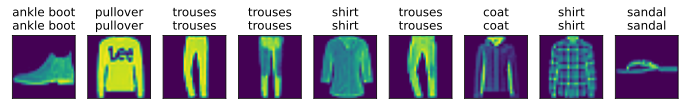

In [46]:
X, y = iter(test_iter).next()

true_labels = get_fashion_mnist_labels(y.numpy())
pred_labels = get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

show_fashion_mnist(X[0:9], titles[0:9])

## 3.7 Softmax 回归的简洁实现

### 3.7.1 获取和读取数据

我们仍然使用Fashion-MNIST数据集和上一节中设置的批量大小。

### 3.7.2 定义和初始化模型

在3.4节（softmax回归）中提到，softmax回归的输出层是一个全连接层，所以我们用一个线性模块就可以了。因为前面我们数据返回的每个batch样本`x`的形状为(batch_size, 1, 28, 28), 所以我们要先用`view()`将`x`的形状转换成(batch_size, 784)才送入全连接层。

In [47]:
num_inputs = 784
num_outputs = 10

class LinearNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
    def forward(self, x): # x shape: (batch, 1, 28, 28)
        y = self.linear(x.view(x.shape[0], -1))
        return y
    
net = LinearNet(num_inputs, num_outputs)


我们将对`x`的形状转换的这个功能自定义一个`FlattenLayer`并记录，方便后面使用。

In [48]:
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

这样我们就可以更方便地定义我们的模型：

In [49]:
from collections import OrderedDict

net = nn.Sequential(
    # FlattenLayer(),
    # nn.Linear(num_inputs, num_outputs)
    OrderedDict([
        ('flatten', FlattenLayer()),
        ('linear', nn.Linear(num_inputs, num_outputs))
    ])
)

然后，我们使用均值为0、标准差为0.01的正态分布随机初始化模型的权重参数。

In [50]:
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0) 

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

### 3.7.3 softmax和交叉熵损失函数

如果做了上一节的练习，那么你可能意识到了分开定义softmax运算和交叉熵损失函数可能会造成数值不稳定。因此，PyTorch提供了一个包括softmax运算和交叉熵损失计算的函数。它的数值稳定性更好。

In [51]:
loss = nn.CrossEntropyLoss()

### 3.7.4 定义优化算法

我们使用学习率为0.1的小批量随机梯度下降作为优化算法。

In [52]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

### 3.7.5 训练模型

接下来，我们使用上一节中定义的训练函数来训练模型。

In [53]:
num_epochs = 5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0031, train acc 0.749, test acc 0.772
epoch 2, loss 0.0022, train acc 0.814, test acc 0.803
epoch 3, loss 0.0021, train acc 0.826, test acc 0.817
epoch 4, loss 0.0020, train acc 0.832, test acc 0.820
epoch 5, loss 0.0019, train acc 0.836, test acc 0.824


## 3.8 多层感知机

我们已经介绍了包括线性回归和softmax回归在内的单层神经网络。然而深度学习主要关注多层模型。在本节中，我们将以多层感知机（multilayer perceptron，MLP）为例，介绍多层神经网络的概念。

### 3.8.1 隐藏层

多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间。图3.3展示了一个多层感知机的神经网络图，它含有一个隐藏层，该层中有5个隐藏单元。

<div align=center>
<img width="350" src="./img/chapter03/3.8_mlp.svg"/>
</div>
<div align=center> 图3.3 带有隐藏层的多层感知机</div>

在图3.3所示的多层感知机中，输入和输出个数分别为4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit）。由于输入层不涉及计算，图3.3中的多层感知机的层数为2。由图3.3可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。


具体来说，给定一个小批量样本$\boldsymbol{X} \in \mathbb{R}^{n \times d}$，其批量大小为$n$，输入个数为$d$。假设多层感知机只有一个隐藏层，其中隐藏单元个数为$h$。记隐藏层的输出（也称为隐藏层变量或隐藏变量）为$\boldsymbol{H}$，有$\boldsymbol{H} \in \mathbb{R}^{n \times h}$。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为$\boldsymbol{W}_h \in \mathbb{R}^{d \times h}$和 $\boldsymbol{b}_h \in \mathbb{R}^{1 \times h}$，输出层的权重和偏差参数分别为$\boldsymbol{W}_o \in \mathbb{R}^{h \times q}$和$\boldsymbol{b}_o \in \mathbb{R}^{1 \times q}$。

我们先来看一种含单隐藏层的多层感知机的设计。其输出$\boldsymbol{O} \in \mathbb{R}^{n \times q}$的计算为

$$
\begin{aligned}
\boldsymbol{H} &= \boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h,\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}      
$$

也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到

$$
\boldsymbol{O} = (\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h)\boldsymbol{W}_o + \boldsymbol{b}_o = \boldsymbol{X} \boldsymbol{W}_h\boldsymbol{W}_o + \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o.
$$

从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数为$\boldsymbol{W}_h\boldsymbol{W}_o$，偏差参数为$\boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$。不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。


### 3.8.2 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数。

### 3.8.2.1 ReLU函数

ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素$x$，该函数定义为

$$\text{ReLU}(x) = \max(x, 0).$$

可以看出，ReLU函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数`xyplot`。

In [54]:
def xyplot(x_vals, y_vals, name):
    set_figsize(figsize=(5, 2.5))
    plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')

我们接下来通过`Tensor`提供的`relu`函数来绘制ReLU函数。可以看到，该激活函数是一个两段线性函数。

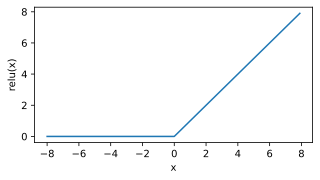

In [55]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

显然，当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数的导数为1。尽管输入为0时ReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。

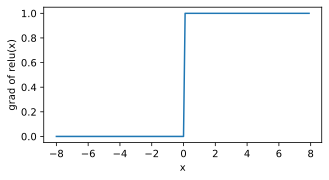

In [56]:
# 由于求导只能由scalar求各个variable的偏导数，而这里y是一个向量，所以做一个.sum()把y转换为标量，而且这样对于所有变量的偏导数是不变的。
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

### 3.8.2.2 sigmoid函数

sigmoid函数可以将元素的值变换到0和1之间：

$$\text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。在后面“循环神经网络”一章中我们会介绍如何利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。下面绘制了sigmoid函数。当输入接近0时，sigmoid函数接近线性变换。

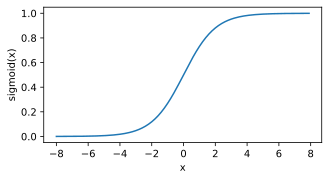

In [57]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

依据链式法则，sigmoid函数的导数

$$\text{sigmoid}'(x) = \text{sigmoid}(x)\left(1-\text{sigmoid}(x)\right).$$


下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。


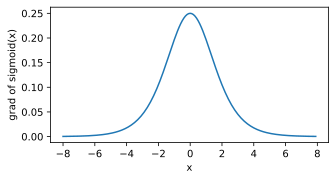

In [58]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

### 3.8.2.3 tanh函数

tanh（双曲正切）函数可以将元素的值变换到-1和1之间：

$$\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

我们接着绘制tanh函数。当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。


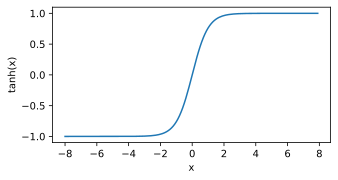

In [59]:
y = x.tanh()
xyplot(x, y, 'tanh')

依据链式法则，tanh函数的导数

$$\text{tanh}'(x) = 1 - \text{tanh}^2(x).$$

下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0。

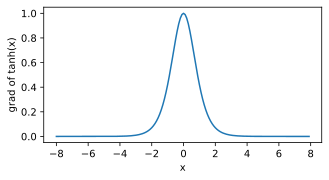

In [60]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

## 3.8.3 多层感知机

多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：

$$
\begin{aligned}
\boldsymbol{H} &= \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}
$$
 
其中$\phi$表示激活函数。在分类问题中，我们可以对输出$\boldsymbol{O}$做softmax运算，并使用softmax回归中的交叉熵损失函数。
在回归问题中，我们将输出层的输出个数设为1，并将输出$\boldsymbol{O}$直接提供给线性回归中使用的平方损失函数。


## 3.9 多层感知机的从零开始实现

### 3.9.1 获取和读取数据

之前已经读好了

### 3.9.2 定义模型参数

我们在3.6节（softmax回归的从零开始实现）里已经介绍了，Fashion-MNIST数据集中图像形状为 $28 \times 28$，类别数为10。本节中我们依然使用长度为 $28 \times 28 = 784$ 的向量表示每一张图像。因此，输入个数为784，输出个数为10。实验中，我们设超参数隐藏单元个数为256。

In [61]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad = True)

### 3.9.3 定义激活函数

In [62]:
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

### 3.9.4 定义模型

In [63]:
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

### 3.9.5 定义损失函数

In [64]:
loss = torch.nn.CrossEntropyLoss()

### 3.9.6 训练模型

In [65]:
num_epochs, lr = 5, 100.0
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0030, train acc 0.712, test acc 0.776
epoch 2, loss 0.0019, train acc 0.823, test acc 0.827
epoch 3, loss 0.0017, train acc 0.843, test acc 0.806
epoch 4, loss 0.0016, train acc 0.855, test acc 0.786
epoch 5, loss 0.0014, train acc 0.864, test acc 0.831


## 3.10 多层感知机的简洁实现

In [66]:
net = nn.Sequential(
    FlattenLayer(),
    nn.Linear(num_inputs, num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens, num_outputs)
    )

for params in net.parameters():
    init.normal_(params, mean = 0, std = 0.01)

In [67]:
batch_size = 256
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)
num_epochs = 5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0031, train acc 0.703, test acc 0.770
epoch 2, loss 0.0019, train acc 0.820, test acc 0.813
epoch 3, loss 0.0016, train acc 0.843, test acc 0.797
epoch 4, loss 0.0015, train acc 0.855, test acc 0.820
epoch 5, loss 0.0014, train acc 0.867, test acc 0.836


# 3.11 模型选择、欠拟合和过拟合

在前几节基于Fashion-MNIST数据集的实验中，我们评价了机器学习模型在训练数据集和测试数据集上的表现。如果你改变过实验中的模型结构或者超参数，你也许发现了：当模型在训练数据集上更准确时，它在测试数据集上却不一定更准确。这是为什么呢？


### 3.11.1 训练误差和泛化误差

在解释上述现象之前，我们需要区分训练误差（training error）和泛化误差（generalization error）。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意一个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使用之前介绍过的损失函数，例如线性回归用到的平方损失函数和softmax回归用到的交叉熵损失函数。

让我们以高考为例来直观地解释训练误差和泛化误差这两个概念。训练误差可以认为是做往年高考试题（训练题）时的错误率，泛化误差则可以通过真正参加高考（测试题）时的答题错误率来近似。假设训练题和测试题都随机采样于一个未知的依照相同考纲的巨大试题库。如果让一名未学习中学知识的小学生去答题，那么测试题和训练题的答题错误率可能很相近。但如果换成一名反复练习训练题的高三备考生答题，即使在训练题上做到了错误率为0，也不代表真实的高考成绩会如此。

在机器学习里，我们通常假设训练数据集（训练题）和测试数据集（测试题）里的每一个样本都是从同一个概率分布中相互独立地生成的。基于该独立同分布假设，给定任意一个机器学习模型（含参数），它的训练误差的期望和泛化误差都是一样的。例如，如果我们将模型参数设成随机值（小学生），那么训练误差和泛化误差会非常相近。但我们从前面几节中已经了解到，模型的参数是通过在训练数据集上训练模型而学习出的，参数的选择依据了最小化训练误差（高三备考生）。所以，训练误差的期望小于或等于泛化误差。也就是说，一般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。

机器学习模型应关注降低泛化误差。


### 3.11.2 模型选择

在机器学习中，通常需要评估若干候选模型的表现并从中选择模型。这一过程称为模型选择（model selection）。可供选择的候选模型可以是有着不同超参数的同类模型。以多层感知机为例，我们可以选择隐藏层的个数，以及每个隐藏层中隐藏单元个数和激活函数。为了得到有效的模型，我们通常要在模型选择上下一番功夫。下面，我们来描述模型选择中经常使用的验证数据集（validation data set）。


#### 3.11.2.1 验证数据集

从严格意义上讲，测试集只能在所有超参数和模型参数选定后使用一次。不可以使用测试数据选择模型，如调参。由于无法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留一部分在训练数据集和测试数据集以外的数据来进行模型选择。这部分数据被称为验证数据集，简称验证集（validation set）。例如，我们可以从给定的训练集中随机选取一小部分作为验证集，而将剩余部分作为真正的训练集。

然而在实际应用中，由于数据不容易获取，测试数据极少只使用一次就丢弃。因此，实践中验证数据集和测试数据集的界限可能比较模糊。从严格意义上讲，除非明确说明，否则本书中实验所使用的测试集应为验证集，实验报告的测试结果（如测试准确率）应为验证结果（如验证准确率）。


### 3.11.2.3 $K$折交叉验证

由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是$K$折交叉验证（$K$-fold cross-validation）。在$K$折交叉验证中，我们把原始训练数据集分割成$K$个不重合的子数据集，然后我们做$K$次模型训练和验证。每一次，我们使用一个子数据集验证模型，并使用其他$K-1$个子数据集来训练模型。在这$K$次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这$K$次训练误差和验证误差分别求平均。



### 3.11.3 欠拟合和过拟合

接下来，我们将探究模型训练中经常出现的两类典型问题：一类是模型无法得到较低的训练误差，我们将这一现象称作欠拟合（underfitting）；另一类是模型的训练误差远小于它在测试数据集上的误差，我们称该现象为过拟合（overfitting）。在实践中，我们要尽可能同时应对欠拟合和过拟合。虽然有很多因素可能导致这两种拟合问题，在这里我们重点讨论两个因素：模型复杂度和训练数据集大小。

> 关于模型复杂度和训练集大小对学习的影响的详细理论分析可参见`译者`写的[这篇博客](https://tangshusen.me/2018/12/09/vc-dimension/)。


### 3.11.3.1 模型复杂度

为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征$x$和对应的标量标签$y$组成的训练数据集，多项式函数拟合的目标是找一个$K$阶多项式函数

$$
\hat{y} = b + \sum_{k=1}^K x^k w_k
$$

来近似 $y$。在上式中，$w_k$是模型的权重参数，$b$是偏差参数。与线性回归相同，多项式函数拟合也使用平方损失函数。特别地，一阶多项式函数拟合又叫线性函数拟合。

因为高阶多项式函数模型参数更多，模型函数的选择空间更大，所以高阶多项式函数比低阶多项式函数的复杂度更高。因此，高阶多项式函数比低阶多项式函数更容易在相同的训练数据集上得到更低的训练误差。给定训练数据集，模型复杂度和误差之间的关系通常如图3.4所示。给定训练数据集，如果模型的复杂度过低，很容易出现欠拟合；如果模型复杂度过高，很容易出现过拟合。应对欠拟合和过拟合的一个办法是针对数据集选择合适复杂度的模型。

<div align=center>
<img width="350" src="./img/chapter03/3.11_capacity_vs_error.svg"/>
</div>
<div align=center>图3.4 模型复杂度对欠拟合和过拟合的影响</div>


### 3.11.3.2 训练数据集大小

影响欠拟合和过拟合的另一个重要因素是训练数据集的大小。一般来说，如果训练数据集中样本数过少，特别是比模型参数数量（按元素计）更少时，过拟合更容易发生。此外，泛化误差不会随训练数据集里样本数量增加而增大。因此，在计算资源允许的范围之内，我们通常希望训练数据集大一些，特别是在模型复杂度较高时，例如层数较多的深度学习模型。


### 3.11.4 多项式函数拟合实验

为了理解模型复杂度和训练数据集大小对欠拟合和过拟合的影响，下面我们以多项式函数拟合为例来实验。首先导入实验需要的包或模块。

``` python
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l
```

### 3.11.4.1 生成数据集

我们将生成一个人工数据集。在训练数据集和测试数据集中，给定样本特征$x$，我们使用如下的三阶多项式函数来生成该样本的标签：

$$y = 1.2x - 3.4x^2 + 5.6x^3 + 5 + \epsilon,$$

其中噪声项$\epsilon$服从均值为0、标准差为0.01的正态分布。训练数据集和测试数据集的样本数都设为100。

``` python
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1) 
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
```

看一看生成的数据集的前两个样本。

``` python
features[:2], poly_features[:2], labels[:2]
```
输出：
```
(tensor([[-1.0613],
         [-0.8386]]), tensor([[-1.0613,  1.1264, -1.1954],
         [-0.8386,  0.7032, -0.5897]]), tensor([-6.8037, -1.7054]))
```

### 3.11.4.2 定义、训练和测试模型

我们先定义作图函数`semilogy`，其中 $y$ 轴使用了对数尺度。

``` python
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)
```

和线性回归一样，多项式函数拟合也使用平方损失函数。因为我们将尝试使用不同复杂度的模型来拟合生成的数据集，所以我们把模型定义部分放在`fit_and_plot`函数中。多项式函数拟合的训练和测试步骤与3.6节（softmax回归的从零开始实现）介绍的softmax回归中的相关步骤类似。

``` python
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear文档可知，pytorch已经将参数初始化了，所以我们这里就不手动初始化了
    
    batch_size = min(10, train_labels.shape[0])    
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)
```

### 3.11.4.3 三阶多项式函数拟合（正常）

我们先使用与数据生成函数同阶的三阶多项式函数拟合。实验表明，这个模型的训练误差和在测试数据集的误差都较低。训练出的模型参数也接近真实值：$w_1 = 1.2, w_2=-3.4, w_3=5.6, b = 5$。

``` python
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], 
            labels[:n_train], labels[n_train:])
```
输出：
```
final epoch: train loss 0.00010175639908993617 test loss 9.790256444830447e-05
weight: tensor([[ 1.1982, -3.3992,  5.6002]]) 
bias: tensor([5.0014])
```
<div align=center>
<img width="350" src="./img/chapter03/3.11_output1.png"/>
</div>


### 3.11.4.4 线性函数拟合（欠拟合）

我们再试试线性函数拟合。很明显，该模型的训练误差在迭代早期下降后便很难继续降低。在完成最后一次迭代周期后，训练误差依旧很高。线性模型在非线性模型（如三阶多项式函数）生成的数据集上容易欠拟合。

``` python
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])
```
输出：
```
final epoch: train loss 249.35157775878906 test loss 168.37705993652344
weight: tensor([[19.4123]]) 
bias: tensor([0.5805])
```
<div align=center>
<img width="350" src="./img/chapter03/3.11_output2.png"/>
</div>

### 3.11.4.5 训练样本不足（过拟合）

事实上，即便使用与数据生成模型同阶的三阶多项式函数模型，如果训练样本不足，该模型依然容易过拟合。让我们只使用两个样本来训练模型。显然，训练样本过少了，甚至少于模型参数的数量。这使模型显得过于复杂，以至于容易被训练数据中的噪声影响。在迭代过程中，尽管训练误差较低，但是测试数据集上的误差却很高。这是典型的过拟合现象。

```python
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])
```
输出：
```
final epoch: train loss 1.198514699935913 test loss 166.037109375
weight: tensor([[1.4741, 2.1198, 2.5674]]) 
bias: tensor([3.1207])
```
<div align=center>
<img width="350" src="./img/chapter03/3.11_output3.png"/>
</div>

我们将在接下来的两个小节继续讨论过拟合问题以及应对过拟合的方法。


In [68]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)

## 3.12 权重衰减

上一节中我们观察了过拟合现象，即模型的训练误差远小于它在测试集上的误差。虽然增大训练数据集可能会减轻过拟合，但是获取额外的训练数据往往代价高昂。本节介绍应对过拟合问题的常用方法：权重衰减（weight decay）。


### 3.12.1 方法

权重衰减等价于 $L_2$ 范数正则化（regularization）。正则化通过为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段。我们先描述$L_2$范数正则化，再解释它为何又称权重衰减。

$L_2$范数正则化在模型原损失函数基础上添加$L_2$范数惩罚项，从而得到训练所需要最小化的函数。$L_2$范数惩罚项指的是模型权重参数每个元素的平方和与一个正的常数的乘积。以3.1节（线性回归）中的线性回归损失函数

$$
\ell(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right)^2
$$

为例，其中$w_1, w_2$是权重参数，$b$是偏差参数，样本$i$的输入为$x_1^{(i)}, x_2^{(i)}$，标签为$y^{(i)}$，样本数为$n$。将权重参数用向量$\boldsymbol{w} = [w_1, w_2]$表示，带有$L_2$范数惩罚项的新损失函数为

$$\ell(w_1, w_2, b) + \frac{\lambda}{2n} \|\boldsymbol{w}\|^2,$$

其中超参数$\lambda > 0$。当权重参数均为0时，惩罚项最小。当$\lambda$较大时，惩罚项在损失函数中的比重较大，这通常会使学到的权重参数的元素较接近0。当$\lambda$设为0时，惩罚项完全不起作用。上式中$L_2$范数平方$\|\boldsymbol{w}\|^2$展开后得到$w_1^2 + w_2^2$。有了$L_2$范数惩罚项后，在小批量随机梯度下降中，我们将线性回归一节中权重$w_1$和$w_2$的迭代方式更改为

$$
\begin{aligned}
w_1 &\leftarrow \left(1- \frac{\eta\lambda}{|\mathcal{B}|} \right)w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_1^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
w_2 &\leftarrow \left(1- \frac{\eta\lambda}{|\mathcal{B}|} \right)w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_2^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right).
\end{aligned}
$$

可见，$L_2$范数正则化令权重$w_1$和$w_2$先自乘小于1的数，再减去不含惩罚项的梯度。因此，$L_2$范数正则化又叫权重衰减。权重衰减通过惩罚绝对值较大的模型参数为需要学习的模型增加了限制，这可能对过拟合有效。实际场景中，我们有时也在惩罚项中添加偏差元素的平方和。

### 3.12.2 高维线性回归实验

下面，我们以高维线性回归为例来引入一个过拟合问题，并使用权重衰减来应对过拟合。设数据样本特征的维度为$p$。对于训练数据集和测试数据集中特征为$x_1, x_2, \ldots, x_p$的任一样本，我们使用如下的线性函数来生成该样本的标签：

$$
y = 0.05 + \sum_{i = 1}^p 0.01x_i +  \epsilon
$$

其中噪声项$\epsilon$服从均值为0、标准差为0.01的正态分布。为了较容易地观察过拟合，我们考虑高维线性回归问题，如设维度$p=200$；同时，我们特意把训练数据集的样本数设低，如20。

In [69]:
n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

### 3.12.3 从零开始实现

### 3.12.3.1 初始化参数模型


In [70]:
def init_params():
    w = torch.randn((num_inputs, 1), requires_grad = True)
    b = torch.zeros(1, requires_grad = True)
    return [w, b]

### 3.12.3.2 定义$L_2$范数惩罚项

In [71]:
def l2_penalty(w):
    return (w  ** 2).sum() / 2

### 3.12.3.3 定义训练和测试
下面定义如何在训练书籍和测试数据集上分别错训练和测试模型。与前面几节中不同的是，这里在计算最终损失函数是添加了$L_2$范数惩罚项

In [72]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = linreg, squared_loss

dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle = True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l = l.sum()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().item())

L2 norm of w: 13.34279727935791


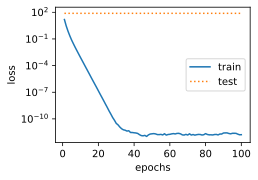

In [73]:
fit_and_plot(lambd=0)

L2 norm of w: 0.0375710055232048


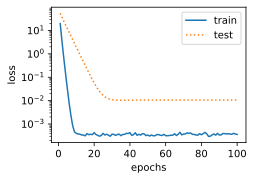

In [74]:
fit_and_plot(lambd=3)

### 3.12.4 简洁实现

这里我们直接在构造优化器实例时通过`weight_decay`参数来指定权重衰减超参数。默认下。PyTorch会对权重和偏差同时衰减。我们可以分别对权重和偏差构造优化器实例，从而只对权重衰减。

In [75]:
def fit_and_plot_pytorch(wd):
    net = nn.Linear(num_inputs, 1)
    nn.init.normal_(net.weight, mean = 0, std = 1)
    nn.init.normal_(net.bias, mean = 0, std = 1)
    optimizer_w = torch.optim.SGD(params=[net.weight], lr = lr, weight_decay = wd) # 对权重进行衰减
    optimizer_b = torch.optim.SGD(params=[net.bias], lr = lr)
    
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            
            l.backward()
            
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', 
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net.weight.data.norm().item())

L2 norm of w: 12.798360824584961


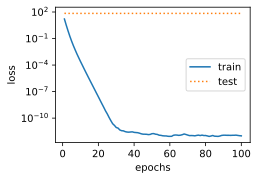

In [76]:
fit_and_plot_pytorch(0)

L2 norm of w: 0.042330723255872726


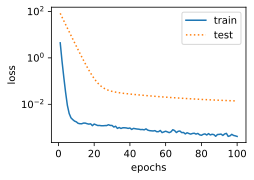

In [77]:
fit_and_plot_pytorch(3)

## 3.13 Dropout (丢弃法)

除了前一节介绍的权重衰减以外，深度学习模型常常使用丢弃法（dropout）[1] 来应对过拟合问题。丢弃法有一些不同的变体。本节中提到的丢弃法特指倒置丢弃法（inverted dropout）。

## 3.13.1 方法

回忆一下，3.8节（多层感知机）的图3.3描述了一个单隐藏层的多层感知机。其中输入个数为4，隐藏单元个数为5，且隐藏单元$h_i$（$i=1, \ldots, 5$）的计算表达式为

$$
h_i = \phi\left(x_1 w_{1i} + x_2 w_{2i} + x_3 w_{3i} + x_4 w_{4i} + b_i\right)
$$

这里$\phi$是激活函数，$x_1, \ldots, x_4$是输入，隐藏单元$i$的权重参数为$w_{1i}, \ldots, w_{4i}$，偏差参数为$b_i$。当对该隐藏层使用丢弃法时，该层的隐藏单元将有一定概率被丢弃掉。设丢弃概率为$p$，那么有$p$的概率$h_i$会被清零，有$1-p$的概率$h_i$会除以$1-p$做拉伸。丢弃概率是丢弃法的超参数。具体来说，设随机变量$\xi_i$为0和1的概率分别为$p$和$1-p$。使用丢弃法时我们计算新的隐藏单元$h_i'$

$$
h_i' = \frac{\xi_i}{1-p} h_i
$$

由于$E(\xi_i) = 1-p$，因此

$$
E(h_i') = \frac{E(\xi_i)}{1-p}h_i = h_i
$$

即**丢弃法不改变其输入的期望值**。让我们对图3.3中的隐藏层使用丢弃法，一种可能的结果如图3.5所示，其中$h_2$和$h_5$被清零。这时输出值的计算不再依赖$h_2$和$h_5$，在反向传播时，与这两个隐藏单元相关的权重的梯度均为0。由于在训练中隐藏层神经元的丢弃是随机的，即$h_1, \ldots, h_5$都有可能被清零，输出层的计算无法过度依赖$h_1, \ldots, h_5$中的任一个，从而在训练模型时起到正则化的作用，并可以用来应对过拟合。在测试模型时，我们为了拿到更加确定性的结果，一般不使用丢弃法。

<div align=center>
<img width="350" src="./img/chapter03/3.13_dropout.svg"/>
</div>
<div align=center> 图3.5 隐藏层使用了丢弃法的多层感知机</div>

## 3.13.2 从零开始实现

根据丢弃法的定义，我们可以很容易地实现它。下面的`dropout`函数将以`drop_prob`的概率丢弃`X`中的元素。

In [78]:
def dropout(X, drop_prob):
    X = X.float()
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob
    
    if keep_prob == 0:
        return torch.zeros_like(X)
    mask = (torch.rand(X.shape) < keep_prob).float()
    
    
    return mask * X / keep_prob

In [79]:
X = torch.arange(16).view(2, 8)
dropout(X, 0)

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])

In [80]:
dropout(X, 0.5)

tensor([[ 0.,  0.,  0.,  6.,  0.,  0., 12.,  0.],
        [ 0.,  0., 20.,  0., 24., 26.,  0., 30.]])

In [81]:
dropout(X, 1.0)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

### 3.13.2.1 定义模型参数

实验中，我们依然使用3.6节（softmax回归的从零开始实现）中介绍的Fashion-MNIST数据集。我们将定义一个包含两个隐藏层的多层感知机，其中两个隐藏层的输出个数都是256。

In [82]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = torch.tensor(np.random.normal(0, 0.01, size=(num_inputs, num_hiddens1)), dtype=torch.float, requires_grad=True)
b1 = torch.zeros(num_hiddens1, requires_grad=True)
W2 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens1, num_hiddens2)), dtype=torch.float, requires_grad=True)
b2 = torch.zeros(num_hiddens2, requires_grad=True)
W3 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens2, num_outputs)), dtype=torch.float, requires_grad=True)
b3 = torch.zeros(num_outputs, requires_grad=True)

params = [W1, b1, W2, b2, W3, b3]

### 3.13.2.2 定义模型

下面定义的模型将全连接层和激活函数ReLU串起来，并对每个激活函数的输出使用丢弃法。我们可以分别设置各个层的丢弃概率。通常的建议是把靠近输入层的丢弃概率设得小一点。在这个实验中，我们把第一个隐藏层的丢弃概率设为0.2，把第二个隐藏层的丢弃概率设为0.5。我们可以通过参数`is_training`来判断运行模式为训练还是测试，并只需在训练模式下使用丢弃法。

In [83]:
drop_prob1, drop_prob2 = 0.2, 0.5

def net(X, is_training=True):
    X = X.view(-1, num_inputs)
    H1 = (torch.matmul(X, W1) + b1).relu()
    if is_training:  # 只在训练模型时使用丢弃法
        H1 = dropout(H1, drop_prob1)  # 在第一层全连接后添加丢弃层
    H2 = (torch.matmul(H1, W2) + b2).relu()
    if is_training:
        H2 = dropout(H2, drop_prob2)  # 在第二层全连接后添加丢弃层
    return torch.matmul(H2, W3) + b3

In [84]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        if isinstance(net, torch.nn.Module):
            net.eval() # 评估模式, 这会关闭dropout
            acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
            net.train() # 改回训练模式
        else: # 自定义的模型
            if('is_training' in net.__code__.co_varnames): # 如果有is_training这个参数
                # 将is_training设置成False
                acc_sum += (net(X, is_training=False).argmax(dim=1) == y).float().sum().item() 
            else:
                acc_sum += (net(X).argmax(dim=1) == y).float().sum().item() 
        n += y.shape[0]
    return acc_sum / n

### 3.13.2.3 训练和测试

In [85]:
num_epochs, lr, batch_size = 5, 100.0, 256
loss = torch.nn.CrossEntropyLoss()
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0045, train acc 0.556, test acc 0.754
epoch 2, loss 0.0023, train acc 0.789, test acc 0.770
epoch 3, loss 0.0019, train acc 0.825, test acc 0.837
epoch 4, loss 0.0017, train acc 0.839, test acc 0.821
epoch 5, loss 0.0016, train acc 0.850, test acc 0.849


### 3.13.3 简洁实现

在PyTorch中，我们只需要在全连接层后天界`Dropout`层并指定丢弃概率。在训练模型是，`Dropout`层将以指定的丢弃概率随机丢弃上一层额输出元素；在测试模型时（即`model.eval()`后），`Dropout`层并不发挥作用。

In [86]:
net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens1),
        nn.ReLU(),
        nn.Dropout(drop_prob1),
        nn.Linear(num_hiddens1, num_hiddens2),
        nn.ReLU(),
        nn.Dropout(drop_prob2),
        nn.Linear(num_hiddens2, 10)
    )
for param in net.parameters():
    nn.init.normal_(param, mean = 0, std = 0.01)

In [87]:
optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0048, train acc 0.524, test acc 0.661
epoch 2, loss 0.0024, train acc 0.772, test acc 0.808
epoch 3, loss 0.0020, train acc 0.818, test acc 0.781
epoch 4, loss 0.0018, train acc 0.836, test acc 0.780
epoch 5, loss 0.0017, train acc 0.843, test acc 0.836


## 3.14 正向传播、反向传播和计算图

前面几节里我们使用了小批量随机梯度下降的优化算法来训练模型。在实现中，我们只提供了模型的正向传播（forward propagation）的计算，即对输入计算模型输出，然后通过`autograd`模块来调用系统自动生成的`backward`函数计算梯度。基于反向传播（back-propagation）算法的自动求梯度极大简化了深度学习模型训练算法的实现。本节我们将使用数学和计算图（computational graph）两个方式来描述正向传播和反向传播。具体来说，我们将以带$L_2$范数正则化的含单隐藏层的多层感知机为样例模型解释正向传播和反向传播。

### 3.14.1 正向传播

正向传播是指对神经网络沿着从输入层到输出层的顺序，依次计算并存储模型的中间变量（包括输出）。为简单起见，假设输入是一个特征为$\boldsymbol{x} \in \mathbb{R}^d$的样本，且不考虑偏差项，那么中间变量

$$\boldsymbol{z} = \boldsymbol{W}^{(1)} \boldsymbol{x},$$

其中$\boldsymbol{W}^{(1)} \in \mathbb{R}^{h \times d}$是隐藏层的权重参数。把中间变量$\boldsymbol{z} \in \mathbb{R}^h$输入按元素运算的激活函数$\phi$后，将得到向量长度为$h$的隐藏层变量

$$\boldsymbol{h} = \phi (\boldsymbol{z}).$$

隐藏层变量$\boldsymbol{h}$也是一个中间变量。假设输出层参数只有权重$\boldsymbol{W}^{(2)} \in \mathbb{R}^{q \times h}$，可以得到向量长度为$q$的输出层变量

$$\boldsymbol{o} = \boldsymbol{W}^{(2)} \boldsymbol{h}.$$

假设损失函数为$\ell$，且样本标签为$y$，可以计算出单个数据样本的损失项

$$L = \ell(\boldsymbol{o}, y).$$

根据$L_2$范数正则化的定义，给定超参数$\lambda$，正则化项即

$$s = \frac{\lambda}{2} \left(\|\boldsymbol{W}^{(1)}\|_F^2 + \|\boldsymbol{W}^{(2)}\|_F^2\right),$$

其中矩阵的Frobenius范数等价于将矩阵变平为向量后计算$L_2$范数。最终，模型在给定的数据样本上带正则化的损失为

$$J = L + s.$$

我们将$J$称为有关给定数据样本的目标函数，并在以下的讨论中简称目标函数。


### 3.14.2 正向传播的计算图

我们通常绘制计算图来可视化运算符和变量在计算中的依赖关系。图3.6绘制了本节中样例模型正向传播的计算图，其中左下角是输入，右上角是输出。可以看到，图中箭头方向大多是向右和向上，其中方框代表变量，圆圈代表运算符，箭头表示从输入到输出之间的依赖关系。

<div align=center>
<img width="400" src="./img/chapter03/3.14_forward.svg"/>
</div>
<div align=center> 图3.6 正向传播的计算图</div>

### 3.14.3 反向传播

反向传播指的是计算神经网络参数梯度的方法。总的来说，反向传播依据微积分中的链式法则，沿着从输出层到输入层的顺序，依次计算并存储目标函数有关神经网络各层的中间变量以及参数的梯度。对输入或输出$\mathsf{X}, \mathsf{Y}, \mathsf{Z}$为任意形状张量的函数$\mathsf{Y}=f(\mathsf{X})$和$\mathsf{Z}=g(\mathsf{Y})$，通过链式法则，我们有

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right),$$

其中$\text{prod}$运算符将根据两个输入的形状，在必要的操作（如转置和互换输入位置）后对两个输入做乘法。

回顾一下本节中样例模型，它的参数是$\boldsymbol{W}^{(1)}$和$\boldsymbol{W}^{(2)}$，因此反向传播的目标是计算$\partial J/\partial \boldsymbol{W}^{(1)}$和$\partial J/\partial \boldsymbol{W}^{(2)}$。我们将应用链式法则依次计算各中间变量和参数的梯度，其计算次序与前向传播中相应中间变量的计算次序恰恰相反。首先，分别计算目标函数$J=L+s$有关损失项$L$和正则项$s$的梯度

$$\frac{\partial J}{\partial L} = 1, \quad \frac{\partial J}{\partial s} = 1.$$

其次，依据链式法则计算目标函数有关输出层变量的梯度$\partial J/\partial \boldsymbol{o} \in \mathbb{R}^q$：

$$
\frac{\partial J}{\partial \boldsymbol{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \boldsymbol{o}}\right)
= \frac{\partial L}{\partial \boldsymbol{o}}.
$$


接下来，计算正则项有关两个参数的梯度：

$$\frac{\partial s}{\partial \boldsymbol{W}^{(1)}} = \lambda \boldsymbol{W}^{(1)},\quad\frac{\partial s}{\partial \boldsymbol{W}^{(2)}} = \lambda \boldsymbol{W}^{(2)}.$$


现在，我们可以计算最靠近输出层的模型参数的梯度$\partial J/\partial \boldsymbol{W}^{(2)} \in \mathbb{R}^{q \times h}$。依据链式法则，得到

$$
\frac{\partial J}{\partial \boldsymbol{W}^{(2)}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{o}}, \frac{\partial \boldsymbol{o}}{\partial \boldsymbol{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \boldsymbol{W}^{(2)}}\right)
= \frac{\partial J}{\partial \boldsymbol{o}} \boldsymbol{h}^\top + \lambda \boldsymbol{W}^{(2)}.
$$


沿着输出层向隐藏层继续反向传播，隐藏层变量的梯度$\partial J/\partial \boldsymbol{h} \in \mathbb{R}^h$可以这样计算：

$$
\frac{\partial J}{\partial \boldsymbol{h}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{o}}, \frac{\partial \boldsymbol{o}}{\partial \boldsymbol{h}}\right)
= {\boldsymbol{W}^{(2)}}^\top \frac{\partial J}{\partial \boldsymbol{o}}.
$$


由于激活函数$\phi$是按元素运算的，中间变量$\boldsymbol{z}$的梯度$\partial J/\partial \boldsymbol{z} \in \mathbb{R}^h$的计算需要使用按元素乘法符$\odot$：

$$
\frac{\partial J}{\partial \boldsymbol{z}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{h}}, \frac{\partial \boldsymbol{h}}{\partial \boldsymbol{z}}\right)
= \frac{\partial J}{\partial \boldsymbol{h}} \odot \phi'\left(\boldsymbol{z}\right).
$$

最终，我们可以得到最靠近输入层的模型参数的梯度$\partial J/\partial \boldsymbol{W}^{(1)} \in \mathbb{R}^{h \times d}$。依据链式法则，得到

$$
\frac{\partial J}{\partial \boldsymbol{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{z}}, \frac{\partial \boldsymbol{z}}{\partial \boldsymbol{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \boldsymbol{W}^{(1)}}\right)
= \frac{\partial J}{\partial \boldsymbol{z}} \boldsymbol{x}^\top + \lambda \boldsymbol{W}^{(1)}.
$$

### 3.14.4 训练深度学习模型

在训练深度学习模型时，正向传播和反向传播之间相互依赖。下面我们仍然以本节中的样例模型分别阐述它们之间的依赖关系。

一方面，正向传播的计算可能依赖于模型参数的当前值，而这些模型参数是在反向传播的梯度计算后通过优化算法迭代的。例如，计算正则化项$s = (\lambda/2) \left(\|\boldsymbol{W}^{(1)}\|_F^2 + \|\boldsymbol{W}^{(2)}\|_F^2\right)$依赖模型参数$\boldsymbol{W}^{(1)}$和$\boldsymbol{W}^{(2)}$的当前值，而这些当前值是优化算法最近一次根据反向传播算出梯度后迭代得到的。

另一方面，反向传播的梯度计算可能依赖于各变量的当前值，而这些变量的当前值是通过正向传播计算得到的。举例来说，参数梯度$\partial J/\partial \boldsymbol{W}^{(2)} = (\partial J / \partial \boldsymbol{o}) \boldsymbol{h}^\top + \lambda \boldsymbol{W}^{(2)}$的计算需要依赖隐藏层变量的当前值$\boldsymbol{h}$。这个当前值是通过从输入层到输出层的正向传播计算并存储得到的。

因此，在模型参数初始化完成后，我们交替地进行正向传播和反向传播，并根据反向传播计算的梯度迭代模型参数。既然我们在反向传播中使用了正向传播中计算得到的中间变量来避免重复计算，那么这个复用也导致正向传播结束后不能立即释放中间变量内存。这也是训练要比预测占用更多内存的一个重要原因。另外需要指出的是，这些中间变量的个数大体上与网络层数线性相关，每个变量的大小跟批量大小和输入个数也是线性相关的，它们是导致较深的神经网络使用较大批量训练时更容易超内存的主要原因。

------------
> 注：本节与原书基本相同，[原书传送门](https://zh.d2l.ai/chapter_deep-learning-basics/backprop.html)

## 3.15 数值稳定性和模型初始化

理解了正向传播与反向传播以后，我们来讨论一下深度学习模型的数值稳定性问题以及模型参数的初始化方法。深度模型有关数值稳定性的典型问题是衰减（vanishing）和爆炸（explosion）。


### 3.15.1 衰减和爆炸

当神经网络的层数较多时，模型的数值稳定性容易变差。假设一个层数为$L$的多层感知机的第$l$层$\boldsymbol{H}^{(l)}$的权重参数为$\boldsymbol{W}^{(l)}$，输出层$\boldsymbol{H}^{(L)}$的权重参数为$\boldsymbol{W}^{(L)}$。为了便于讨论，不考虑偏差参数，且设所有隐藏层的激活函数为恒等映射（identity mapping）$\phi(x) = x$。给定输入$\boldsymbol{X}$，多层感知机的第$l$层的输出$\boldsymbol{H}^{(l)} = \boldsymbol{X} \boldsymbol{W}^{(1)} \boldsymbol{W}^{(2)} \ldots \boldsymbol{W}^{(l)}$。此时，如果层数$l$较大，$\boldsymbol{H}^{(l)}$的计算可能会出现衰减或爆炸。举个例子，假设输入和所有层的权重参数都是标量，如权重参数为0.2和5，多层感知机的第30层输出为输入$\boldsymbol{X}$分别与$0.2^{30} \approx 1 \times 10^{-21}$（衰减）和$5^{30} \approx 9 \times 10^{20}$（爆炸）的乘积。类似地，当层数较多时，梯度的计算也更容易出现衰减或爆炸。

随着内容的不断深入，我们会在后面的章节进一步介绍深度学习的数值稳定性问题以及解决方法。


### 3.15.2 随机初始化模型参数

在神经网络中，通常需要随机初始化模型参数。下面我们来解释这样做的原因。

回顾3.8节（多层感知机）图3.3描述的多层感知机。为了方便解释，假设输出层只保留一个输出单元$o_1$（删去$o_2$和$o_3$以及指向它们的箭头），且隐藏层使用相同的激活函数。如果将每个隐藏单元的参数都初始化为相等的值，那么在正向传播时每个隐藏单元将根据相同的输入计算出相同的值，并传递至输出层。在反向传播中，每个隐藏单元的参数梯度值相等。因此，这些参数在使用基于梯度的优化算法迭代后值依然相等。之后的迭代也是如此。在这种情况下，无论隐藏单元有多少，隐藏层本质上只有1个隐藏单元在发挥作用。因此，正如在前面的实验中所做的那样，我们通常将神经网络的模型参数，特别是权重参数，进行随机初始化。


### 3.15.2.1 PyTorch的默认随机初始化

随机初始化模型参数的方法有很多。在3.3节（线性回归的简洁实现）中，我们使用`torch.nn.init.normal_()`使模型`net`的权重参数采用正态分布的随机初始化方式。不过，PyTorch中`nn.Module`的模块参数都采取了较为合理的初始化策略（不同类型的layer具体采样的哪一种初始化方法的可参考[源代码](https://github.com/pytorch/pytorch/tree/master/torch/nn/modules)），因此一般不用我们考虑。


### 3.15.2.2 Xavier随机初始化

还有一种比较常用的随机初始化方法叫作Xavier随机初始化[1]。
假设某全连接层的输入个数为$a$，输出个数为$b$，Xavier随机初始化将使该层中权重参数的每个元素都随机采样于均匀分布

$$U\left(-\sqrt{\frac{6}{a+b}}, \sqrt{\frac{6}{a+b}}\right).$$

它的设计主要考虑到，模型参数初始化后，每层输出的方差不该受该层输入个数影响，且每层梯度的方差也不该受该层输出个数影响。

[1] Glorot, X., & Bengio, Y. (2010, March). Understanding the difficulty of training deep feedforward neural networks. In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 249-256).

## TODO: 3.16 Kaggle 房价预测

## 4.1 模型构造

让我们回顾一下在3.10节（多层感知机的简洁实现）中含单隐藏层的多层感知机的实现方法。我们首先构造`Sequential`实例，然后依次添加两个全连接层。其中第一层的输出大小为256，即隐藏层单元个数是256；第二层的输出大小为10，即输出层单元个数是10。我们在上一章的其他节中也使用了`Sequential`类构造模型。这里我们介绍另外一种基于`Module`类的模型构造方法：它让模型构造更加灵活。

> 注：其实前面我们陆陆续续已经使用了这些方法了，本节系统介绍一下。


### 4.1.1 继承`Module`类来构造模型

`Module`类是`nn`模块里提供的一个模型构造类，是所有神经网络模块的基类，我们可以继承它来定义我们想要的模型。下面继承`Module`类构造本节开头提到的多层感知机。这里定义的`MLP`类重载了`Module`类的`__init__`函数和`forward`函数。它们分别用于创建模型参数和定义前向计算。前向计算也即正向传播。

``` python
import torch
from torch import nn

class MLP(nn.Module):
    # 声明带有模型参数的层，这里声明了两个全连接层
    def __init__(self, **kwargs):
        # 调用MLP父类Module的构造函数来进行必要的初始化。这样在构造实例时还可以指定其他函数
        # 参数，如“模型参数的访问、初始化和共享”一节将介绍的模型参数params
        super(MLP, self).__init__(**kwargs)
        self.hidden = nn.Linear(784, 256) # 隐藏层
        self.act = nn.ReLU()
        self.output = nn.Linear(256, 10)  # 输出层
         

    # 定义模型的前向计算，即如何根据输入x计算返回所需要的模型输出
    def forward(self, x):
        a = self.act(self.hidden(x))
        return self.output(a)
```

以上的`MLP`类中无须定义反向传播函数。系统将通过自动求梯度而自动生成反向传播所需的`backward`函数。

我们可以实例化`MLP`类得到模型变量`net`。下面的代码初始化`net`并传入输入数据`X`做一次前向计算。其中，`net(X)`会调用`MLP`继承自`Module`类的`__call__`函数，这个函数将调用`MLP`类定义的`forward`函数来完成前向计算。

``` python
X = torch.rand(2, 784)
net = MLP()
print(net)
net(X)
```
输出：
```
MLP(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (act): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)
tensor([[-0.1798, -0.2253,  0.0206, -0.1067, -0.0889,  0.1818, -0.1474,  0.1845,
         -0.1870,  0.1970],
        [-0.1843, -0.1562, -0.0090,  0.0351, -0.1538,  0.0992, -0.0883,  0.0911,
         -0.2293,  0.2360]], grad_fn=<ThAddmmBackward>)
```

注意，这里并没有将`Module`类命名为`Layer`（层）或者`Model`（模型）之类的名字，这是因为该类是一个可供自由组建的部件。它的子类既可以是一个层（如PyTorch提供的`Linear`类），又可以是一个模型（如这里定义的`MLP`类），或者是模型的一个部分。我们下面通过两个例子来展示它的灵活性。

### 4.1.2 `Module`的子类
我们刚刚提到，`Module`类是一个通用的部件。事实上，PyTorch还实现了继承自`Module`的可以方便构建模型的类: 如`Sequential`、`ModuleList`和`ModuleDict`等等。

### 4.1.2.1 `Sequential`类
当模型的前向计算为简单串联各个层的计算时，`Sequential`类可以通过更加简单的方式定义模型。这正是`Sequential`类的目的：它可以接收一个子模块的有序字典（OrderedDict）或者一系列子模块作为参数来逐一添加`Module`的实例，而模型的前向计算就是将这些实例按添加的顺序逐一计算。

下面我们实现一个与`Sequential`类有相同功能的`MySequential`类。这或许可以帮助读者更加清晰地理解`Sequential`类的工作机制。

``` python
class MySequential(nn.Module):
    from collections import OrderedDict
    def __init__(self, *args):
        super(MySequential, self).__init__()
        if len(args) == 1 and isinstance(args[0], OrderedDict): # 如果传入的是一个OrderedDict
            for key, module in args[0].items():
                self.add_module(key, module)  # add_module方法会将module添加进self._modules(一个OrderedDict)
        else:  # 传入的是一些Module
            for idx, module in enumerate(args):
                self.add_module(str(idx), module)
    def forward(self, input):
        # self._modules返回一个 OrderedDict，保证会按照成员添加时的顺序遍历成员
        for module in self._modules.values():
            input = module(input)
        return input
```

我们用`MySequential`类来实现前面描述的`MLP`类，并使用随机初始化的模型做一次前向计算。

``` python
net = MySequential(
        nn.Linear(784, 256),
        nn.ReLU(),
        nn.Linear(256, 10), 
        )
print(net)
net(X)
```
输出：
```
MySequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)
tensor([[-0.0100, -0.2516,  0.0392, -0.1684, -0.0937,  0.2191, -0.1448,  0.0930,
          0.1228, -0.2540],
        [-0.1086, -0.1858,  0.0203, -0.2051, -0.1404,  0.2738, -0.0607,  0.0622,
          0.0817, -0.2574]], grad_fn=<ThAddmmBackward>)
```

可以观察到这里`MySequential`类的使用跟3.10节（多层感知机的简洁实现）中`Sequential`类的使用没什么区别。

### 4.1.2.2 `ModuleList`类
`ModuleList`接收一个子模块的列表作为输入，然后也可以类似List那样进行append和extend操作:
``` python
net = nn.ModuleList([nn.Linear(784, 256), nn.ReLU()])
net.append(nn.Linear(256, 10)) # # 类似List的append操作
print(net[-1])  # 类似List的索引访问
print(net)
# net(torch.zeros(1, 784)) # 会报NotImplementedError
```
输出：
```
Linear(in_features=256, out_features=10, bias=True)
ModuleList(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)
```

既然`Sequential`和`ModuleList`都可以进行列表化构造网络，那二者区别是什么呢。`ModuleList`仅仅是一个储存各种模块的列表，这些模块之间没有联系也没有顺序（所以不用保证相邻层的输入输出维度匹配），而且没有实现`forward`功能需要自己实现，所以上面执行`net(torch.zeros(1, 784))`会报`NotImplementedError`；而`Sequential`内的模块需要按照顺序排列，要保证相邻层的输入输出大小相匹配，内部`forward`功能已经实现。

`ModuleList`的出现只是让网络定义前向传播时更加灵活，见下面官网的例子。
``` python
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        # ModuleList can act as an iterable, or be indexed using ints
        for i, l in enumerate(self.linears):
            x = self.linears[i // 2](x) + l(x)
        return x
```

另外，`ModuleList`不同于一般的Python的`list`，加入到`ModuleList`里面的所有模块的参数会被自动添加到整个网络中，下面看一个例子对比一下。

``` python
class Module_ModuleList(nn.Module):
    def __init__(self):
        super(Module_ModuleList, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10)])
    
class Module_List(nn.Module):
    def __init__(self):
        super(Module_List, self).__init__()
        self.linears = [nn.Linear(10, 10)]

net1 = Module_ModuleList()
net2 = Module_List()

print("net1:")
for p in net1.parameters():
    print(p.size())

print("net2:")
for p in net2.parameters():
    print(p)
```
输出：
```
net1:
torch.Size([10, 10])
torch.Size([10])
net2:
```


### 4.1.2.3 `ModuleDict`类
`ModuleDict`接收一个子模块的字典作为输入, 然后也可以类似字典那样进行添加访问操作:
``` python
net = nn.ModuleDict({
    'linear': nn.Linear(784, 256),
    'act': nn.ReLU(),
})
net['output'] = nn.Linear(256, 10) # 添加
print(net['linear']) # 访问
print(net.output)
print(net)
# net(torch.zeros(1, 784)) # 会报NotImplementedError
```
输出：
```
Linear(in_features=784, out_features=256, bias=True)
Linear(in_features=256, out_features=10, bias=True)
ModuleDict(
  (act): ReLU()
  (linear): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)
```

和`ModuleList`一样，`ModuleDict`实例仅仅是存放了一些模块的字典，并没有定义`forward`函数需要自己定义。同样，`ModuleDict`也与Python的`Dict`有所不同，`ModuleDict`里的所有模块的参数会被自动添加到整个网络中。

### 4.1.3 构造复杂的模型

虽然上面介绍的这些类可以使模型构造更加简单，且不需要定义`forward`函数，但直接继承`Module`类可以极大地拓展模型构造的灵活性。下面我们构造一个稍微复杂点的网络`FancyMLP`。在这个网络中，我们通过`get_constant`函数创建训练中不被迭代的参数，即常数参数。在前向计算中，除了使用创建的常数参数外，我们还使用`Tensor`的函数和Python的控制流，并多次调用相同的层。

``` python
class FancyMLP(nn.Module):
    def __init__(self, **kwargs):
        super(FancyMLP, self).__init__(**kwargs)
        
        self.rand_weight = torch.rand((20, 20), requires_grad=False) # 不可训练参数（常数参数）
        self.linear = nn.Linear(20, 20)

    def forward(self, x):
        x = self.linear(x)
        # 使用创建的常数参数，以及nn.functional中的relu函数和mm函数
        x = nn.functional.relu(torch.mm(x, self.rand_weight.data) + 1)
        
        # 复用全连接层。等价于两个全连接层共享参数
        x = self.linear(x)
        # 控制流，这里我们需要调用item函数来返回标量进行比较
        while x.norm().item() > 1:
            x /= 2
        if x.norm().item() < 0.8:
            x *= 10
        return x.sum()
```

在这个`FancyMLP`模型中，我们使用了常数权重`rand_weight`（注意它不是可训练模型参数）、做了矩阵乘法操作（`torch.mm`）并重复使用了相同的`Linear`层。下面我们来测试该模型的前向计算。

``` python
X = torch.rand(2, 20)
net = FancyMLP()
print(net)
net(X)
```
输出：
```
FancyMLP(
  (linear): Linear(in_features=20, out_features=20, bias=True)
)
tensor(0.8432, grad_fn=<SumBackward0>)
```

因为`FancyMLP`和`Sequential`类都是`Module`类的子类，所以我们可以嵌套调用它们。

``` python
class NestMLP(nn.Module):
    def __init__(self, **kwargs):
        super(NestMLP, self).__init__(**kwargs)
        self.net = nn.Sequential(nn.Linear(40, 30), nn.ReLU()) 

    def forward(self, x):
        return self.net(x)

net = nn.Sequential(NestMLP(), nn.Linear(30, 20), FancyMLP())

X = torch.rand(2, 40)
print(net)
net(X)
```
输出：
```
Sequential(
  (0): NestMLP(
    (net): Sequential(
      (0): Linear(in_features=40, out_features=30, bias=True)
      (1): ReLU()
    )
  )
  (1): Linear(in_features=30, out_features=20, bias=True)
  (2): FancyMLP(
    (linear): Linear(in_features=20, out_features=20, bias=True)
  )
)
tensor(14.4908, grad_fn=<SumBackward0>)
```


* 可以通过继承`Module`类来构造模型。
* `Sequential`、`ModuleList`、`ModuleDict`类都继承自`Module`类。
* 与`Sequential`不同，`ModuleList`和`ModuleDict`并没有定义一个完整的网络，它们只是将不同的模块存放在一起，需要自己定义`forward`函数。
* 虽然`Sequential`等类可以使模型构造更加简单，但直接继承`Module`类可以极大地拓展模型构造的灵活性。



-----------
> 注：本节与原书此节有一些不同，[原书传送门](https://zh.d2l.ai/chapter_deep-learning-computation/model-construction.html)




## 4.2 模型参数的访问、初始化和共享

在3.3节（线性回归的简洁实现）中，我们通过`init`模块来初始化模型的参数。我们也介绍了访问模型参数的简单方法。本节将深入讲解如何访问和初始化模型参数，以及如何在多个层之间共享同一份模型参数。

我们先定义一个与上一节中相同的含单隐藏层的多层感知机。我们依然使用默认方式初始化它的参数，并做一次前向计算。与之前不同的是，在这里我们从`nn`中导入了`init`模块，它包含了多种模型初始化方法。

``` python
import torch
from torch import nn
from torch.nn import init

net = nn.Sequential(nn.Linear(4, 3), nn.ReLU(), nn.Linear(3, 1))  # pytorch已进行默认初始化

print(net)
X = torch.rand(2, 4)
Y = net(X).sum()
```
输出：
```
Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)
```

### 4.2.1 访问模型参数

回忆一下上一节中提到的`Sequential`类与`Module`类的继承关系。对于`Sequential`实例中含模型参数的层，我们可以通过`Module`类的`parameters()`或者`named_parameters`方法来访问所有参数（以迭代器的形式返回），后者除了返回参数`Tensor`外还会返回其名字。下面，访问多层感知机`net`的所有参数：
``` python
print(type(net.named_parameters()))
for name, param in net.named_parameters():
    print(name, param.size())
```
输出：
```
<class 'generator'>
0.weight torch.Size([3, 4])
0.bias torch.Size([3])
2.weight torch.Size([1, 3])
2.bias torch.Size([1])
```
可见返回的名字自动加上了层数的索引作为前缀。
我们再来访问`net`中单层的参数。对于使用`Sequential`类构造的神经网络，我们可以通过方括号`[]`来访问网络的任一层。索引0表示隐藏层为`Sequential`实例最先添加的层。

``` python
for name, param in net[0].named_parameters():
    print(name, param.size(), type(param))
```
输出：
```
weight torch.Size([3, 4]) <class 'torch.nn.parameter.Parameter'>
bias torch.Size([3]) <class 'torch.nn.parameter.Parameter'>
```
因为这里是单层的所以没有了层数索引的前缀。另外返回的`param`的类型为`torch.nn.parameter.Parameter`，其实这是`Tensor`的子类，和`Tensor`不同的是如果一个`Tensor`是`Parameter`，那么它会自动被添加到模型的参数列表里，来看下面这个例子。
``` python
class MyModel(nn.Module):
    def __init__(self, **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.weight1 = nn.Parameter(torch.rand(20, 20))
        self.weight2 = torch.rand(20, 20)
    def forward(self, x):
        pass
    
n = MyModel()
for name, param in n.named_parameters():
    print(name)
```
输出:
```
weight1
```
上面的代码中`weight1`在参数列表中但是`weight2`却没在参数列表中。

因为`Parameter`是`Tensor`，即`Tensor`拥有的属性它都有，比如可以根据`data`来访问参数数值，用`grad`来访问参数梯度。
``` python
weight_0 = list(net[0].parameters())[0]
print(weight_0.data)
print(weight_0.grad) # 反向传播前梯度为None
Y.backward()
print(weight_0.grad)
```
输出：
```
tensor([[ 0.2719, -0.0898, -0.2462,  0.0655],
        [-0.4669, -0.2703,  0.3230,  0.2067],
        [-0.2708,  0.1171, -0.0995,  0.3913]])
None
tensor([[-0.2281, -0.0653, -0.1646, -0.2569],
        [-0.1916, -0.0549, -0.1382, -0.2158],
        [ 0.0000,  0.0000,  0.0000,  0.0000]])
```

### 4.2.2 初始化模型参数

我们在3.15节（数值稳定性和模型初始化）中提到了PyTorch中`nn.Module`的模块参数都采取了较为合理的初始化策略（不同类型的layer具体采样的哪一种初始化方法的可参考[源代码](https://github.com/pytorch/pytorch/tree/master/torch/nn/modules)）。但我们经常需要使用其他方法来初始化权重。PyTorch的`init`模块里提供了多种预设的初始化方法。在下面的例子中，我们将权重参数初始化成均值为0、标准差为0.01的正态分布随机数，并依然将偏差参数清零。

``` python
for name, param in net.named_parameters():
    if 'weight' in name:
        init.normal_(param, mean=0, std=0.01)
        print(name, param.data)
```
输出：
```
0.weight tensor([[ 0.0030,  0.0094,  0.0070, -0.0010],
        [ 0.0001,  0.0039,  0.0105, -0.0126],
        [ 0.0105, -0.0135, -0.0047, -0.0006]])
2.weight tensor([[-0.0074,  0.0051,  0.0066]])
```

下面使用常数来初始化权重参数。

``` python
for name, param in net.named_parameters():
    if 'bias' in name:
        init.constant_(param, val=0)
        print(name, param.data)
```
输出：
```
0.bias tensor([0., 0., 0.])
2.bias tensor([0.])
```

### 4.2.3 自定义初始化方法

有时候我们需要的初始化方法并没有在`init`模块中提供。这时，可以实现一个初始化方法，从而能够像使用其他初始化方法那样使用它。在这之前我们先来看看PyTorch是怎么实现这些初始化方法的，例如`torch.nn.init.normal_`：
``` python
def normal_(tensor, mean=0, std=1):
    with torch.no_grad():
        return tensor.normal_(mean, std)
```
可以看到这就是一个inplace改变`Tensor`值的函数，而且这个过程是不记录梯度的。
类似的我们来实现一个自定义的初始化方法。在下面的例子里，我们令权重有一半概率初始化为0，有另一半概率初始化为$[-10,-5]$和$[5,10]$两个区间里均匀分布的随机数。

``` python
def init_weight_(tensor):
    with torch.no_grad():
        tensor.uniform_(-10, 10)
        tensor *= (tensor.abs() >= 5).float()

for name, param in net.named_parameters():
    if 'weight' in name:
        init_weight_(param)
        print(name, param.data)
```
输出：
```
0.weight tensor([[ 7.0403,  0.0000, -9.4569,  7.0111],
        [-0.0000, -0.0000,  0.0000,  0.0000],
        [ 9.8063, -0.0000,  0.0000, -9.7993]])
2.weight tensor([[-5.8198,  7.7558, -5.0293]])
```

此外，参考2.3.2节，我们还可以通过改变这些参数的`data`来改写模型参数值同时不会影响梯度:
``` python
for name, param in net.named_parameters():
    if 'bias' in name:
        param.data += 1
        print(name, param.data)
```
输出：
```
0.bias tensor([1., 1., 1.])
2.bias tensor([1.])
```


### 4.2.4 共享模型参数

在有些情况下，我们希望在多个层之间共享模型参数。4.1.3节提到了如何共享模型参数: `Module`类的`forward`函数里多次调用同一个层。此外，如果我们传入`Sequential`的模块是同一个`Module`实例的话参数也是共享的，下面来看一个例子: 

``` python
linear = nn.Linear(1, 1, bias=False)
net = nn.Sequential(linear, linear) 
print(net)
for name, param in net.named_parameters():
    init.constant_(param, val=3)
    print(name, param.data)
```
输出：
```
Sequential(
  (0): Linear(in_features=1, out_features=1, bias=False)
  (1): Linear(in_features=1, out_features=1, bias=False)
)
0.weight tensor([[3.]])
```

在内存中，这两个线性层其实一个对象:
``` python
print(id(net[0]) == id(net[1]))
print(id(net[0].weight) == id(net[1].weight))
```
输出:
```
True
True
```

因为模型参数里包含了梯度，所以在反向传播计算时，这些共享的参数的梯度是累加的:
``` python
x = torch.ones(1, 1)
y = net(x).sum()
print(y)
y.backward()
print(net[0].weight.grad) # 单次梯度是3，两次所以就是6
```
输出:
```
tensor(9., grad_fn=<SumBackward0>)
tensor([[6.]])
```
* 有多种方法来访问、初始化和共享模型参数。
* 可以自定义初始化方法。

-----------
> 注：本节与原书此节有一些不同，[原书传送门](https://zh.d2l.ai/chapter_deep-learning-computation/parameters.html)




## 4.4 自定义层

深度学习的一个魅力在于神经网络中各式各样的层，例如全连接层和后面章节中将要介绍的卷积层、池化层与循环层。虽然PyTorch提供了大量常用的层，但有时候我们依然希望自定义层。本节将介绍如何使用`Module`来自定义层，从而可以被重复调用。


### 4.4.1 不含模型参数的自定义层

我们先介绍如何定义一个不含模型参数的自定义层。事实上，这和4.1节（模型构造）中介绍的使用`Module`类构造模型类似。下面的`CenteredLayer`类通过继承`Module`类自定义了一个将输入减掉均值后输出的层，并将层的计算定义在了`forward`函数里。这个层里不含模型参数。

``` python
import torch
from torch import nn

class CenteredLayer(nn.Module):
    def __init__(self, **kwargs):
        super(CenteredLayer, self).__init__(**kwargs)
    def forward(self, x):
        return x - x.mean()
```

我们可以实例化这个层，然后做前向计算。

``` python
layer = CenteredLayer()
layer(torch.tensor([1, 2, 3, 4, 5], dtype=torch.float))
```
输出：
```
tensor([-2., -1.,  0.,  1.,  2.])
```

我们也可以用它来构造更复杂的模型。

``` python
net = nn.Sequential(nn.Linear(8, 128), CenteredLayer())
```

下面打印自定义层各个输出的均值。因为均值是浮点数，所以它的值是一个很接近0的数。

``` python
y = net(torch.rand(4, 8))
y.mean().item()
```
输出：
```
0.0
```

### 4.4.2 含模型参数的自定义层

我们还可以自定义含模型参数的自定义层。其中的模型参数可以通过训练学出。

在4.2节（模型参数的访问、初始化和共享）中介绍了`Parameter`类其实是`Tensor`的子类，如果一个`Tensor`是`Parameter`，那么它会自动被添加到模型的参数列表里。所以在自定义含模型参数的层时，我们应该将参数定义成`Parameter`，除了像4.2.1节那样直接定义成`Parameter`类外，还可以使用`ParameterList`和`ParameterDict`分别定义参数的列表和字典。

`ParameterList`接收一个`Parameter`实例的列表作为输入然后得到一个参数列表，使用的时候可以用索引来访问某个参数，另外也可以使用`append`和`extend`在列表后面新增参数。
``` python
class MyDense(nn.Module):
    def __init__(self):
        super(MyDense, self).__init__()
        self.params = nn.ParameterList([nn.Parameter(torch.randn(4, 4)) for i in range(3)])
        self.params.append(nn.Parameter(torch.randn(4, 1)))

    def forward(self, x):
        for i in range(len(self.params)):
            x = torch.mm(x, self.params[i])
        return x
net = MyDense()
print(net)
```
输出：
```
MyDense(
  (params): ParameterList(
      (0): Parameter containing: [torch.FloatTensor of size 4x4]
      (1): Parameter containing: [torch.FloatTensor of size 4x4]
      (2): Parameter containing: [torch.FloatTensor of size 4x4]
      (3): Parameter containing: [torch.FloatTensor of size 4x1]
  )
)
```
而`ParameterDict`接收一个`Parameter`实例的字典作为输入然后得到一个参数字典，然后可以按照字典的规则使用了。例如使用`update()`新增参数，使用`keys()`返回所有键值，使用`items()`返回所有键值对等等，可参考[官方文档](https://pytorch.org/docs/stable/nn.html#parameterdict)。

``` python
class MyDictDense(nn.Module):
    def __init__(self):
        super(MyDictDense, self).__init__()
        self.params = nn.ParameterDict({
                'linear1': nn.Parameter(torch.randn(4, 4)),
                'linear2': nn.Parameter(torch.randn(4, 1))
        })
        self.params.update({'linear3': nn.Parameter(torch.randn(4, 2))}) # 新增

    def forward(self, x, choice='linear1'):
        return torch.mm(x, self.params[choice])

net = MyDictDense()
print(net)
```
输出：
```
MyDictDense(
  (params): ParameterDict(
      (linear1): Parameter containing: [torch.FloatTensor of size 4x4]
      (linear2): Parameter containing: [torch.FloatTensor of size 4x1]
      (linear3): Parameter containing: [torch.FloatTensor of size 4x2]
  )
)
```
这样就可以根据传入的键值来进行不同的前向传播：
``` python
x = torch.ones(1, 4)
print(net(x, 'linear1'))
print(net(x, 'linear2'))
print(net(x, 'linear3'))
```
输出：
```
tensor([[1.5082, 1.5574, 2.1651, 1.2409]], grad_fn=<MmBackward>)
tensor([[-0.8783]], grad_fn=<MmBackward>)
tensor([[ 2.2193, -1.6539]], grad_fn=<MmBackward>)
```

我们也可以使用自定义层构造模型。它和PyTorch的其他层在使用上很类似。

``` python
net = nn.Sequential(
    MyDictDense(),
    MyListDense(),
)
print(net)
print(net(x))
```
输出：
```
Sequential(
  (0): MyDictDense(
    (params): ParameterDict(
        (linear1): Parameter containing: [torch.FloatTensor of size 4x4]
        (linear2): Parameter containing: [torch.FloatTensor of size 4x1]
        (linear3): Parameter containing: [torch.FloatTensor of size 4x2]
    )
  )
  (1): MyListDense(
    (params): ParameterList(
        (0): Parameter containing: [torch.FloatTensor of size 4x4]
        (1): Parameter containing: [torch.FloatTensor of size 4x4]
        (2): Parameter containing: [torch.FloatTensor of size 4x4]
        (3): Parameter containing: [torch.FloatTensor of size 4x1]
    )
  )
)
tensor([[-101.2394]], grad_fn=<MmBackward>)
```

* 可以通过`Module`类自定义神经网络中的层，从而可以被重复调用。


-----------
> 注：本节与原书此节有一些不同，[原书传送门](https://zh.d2l.ai/chapter_deep-learning-computation/custom-layer.html)



## 4.5 读取和储存

### 4.5.1 读写Tensor

我们可以直接使用`save`函数和`load`函数分别存储和读取`Tensor`。`save`使用Python的pickle实用程序将对象进行序列化，然后将序列化的对象保存到disk，使用`save`可以保存各种对象,包括模型、张量和字典等。而`load`使用pickle unpickle工具将pickle的对象文件反序列化为内存。

下面的例子创建了`Tensor`变量`x`，并将其存在文件名同为`x.pt`的文件里。

In [88]:
import torch
from torch import nn

x = torch.ones(3)

torch.save(x, './data/x.pt')

In [89]:
x2 = torch.load('./data/x.pt')
x2

tensor([1., 1., 1.])

In [90]:
y = torch.zeros(4)
torch.save([x, y], './data/xy.pt')

In [91]:
xy_list = torch.load('./data/xy.pt')
xy_list

[tensor([1., 1., 1.]), tensor([0., 0., 0., 0.])]

In [92]:
torch.save({'x': x, 'y': y}, './data/xy_dict.pt')

In [93]:
xy = torch.load('./data/xy_dict.pt')
xy

{'x': tensor([1., 1., 1.]), 'y': tensor([0., 0., 0., 0.])}

### 4.5.2 读写模型

### 4.5.2.1 `state_dict`

在PyTorch中，`Module`的可学习参数(即权重和偏差)，模块模型包含在参数中(通过`model.parameters()`访问)。`state_dict`是一个从参数名称隐射到参数`Tesnor`的字典对象。

In [94]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(3, 2)
        self.act = nn.ReLU()
        self.output = nn.Linear(2, 1)
    
    def forward(self, x):
        a = self.act(self.hidden(x))
        return self.output(a)
    
net = MLP()
net.state_dict()

OrderedDict([('hidden.weight',
              tensor([[ 0.3355,  0.3952, -0.5438],
                      [-0.3263,  0.2855,  0.2347]])),
             ('hidden.bias', tensor([-0.0844, -0.3031])),
             ('output.weight', tensor([[-0.1817,  0.6474]])),
             ('output.bias', tensor([-0.2292]))])

In [95]:
net.cuda()

MLP(
  (hidden): Linear(in_features=3, out_features=2, bias=True)
  (act): ReLU()
  (output): Linear(in_features=2, out_features=1, bias=True)
)

注意，只有具有可学习参数的层(卷积层、线性层等)才有`state_dict`中的条目。优化器(`optim`)也有一个`state_dict`，其中包含关于优化器状态以及所使用的超参数的信息。

In [96]:
optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'momentum': 0.9,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [2427670108992, 2427670107520, 2427670109184, 2427670107200]}]}

### 4.5.2.2 保存和加载模型

PyTorch中保存和加载训练模型有两种常见的方法：
1. 仅保存和加载模型参数
2. 保存和加载整个模型

### 1. 保存和加载`state_dict`（推荐）

保存：
```python
torch.save(model.state_dict(), PATH) # 推荐的文件后缀名是pt或pth
```

加载
```python
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
```

### 2. 保存和加载整个模型

保存：
```python
torch.save(model, PATH)
```

加载：
```python
model = torch.load(PATH)
```

In [97]:
net.cpu()

X = torch.randn(2, 3)
Y = net(X)
PATH = './data/net.pt'
torch.save(net.state_dict(), PATH)

net2 = MLP()
net2.load_state_dict(torch.load(PATH))
Y2 = net2(X)
Y2 == Y

tensor([[True],
        [True]])

因为这`net`和`net2`都有同样的模型参数，那么对同一个输入`X`的计算结果将会是一样的。上面的输出也验证了这一点。

此外，还有一些其他使用场景，例如GPU与CPU之间的模型保存与读取、使用多块GPU的模型的存储等等，使用的时候可以参考[官方文档](https://pytorch.org/tutorials/beginner/saving_loading_models.html)。

# 4.6 GPU计算

到目前为止，我们一直在使用CPU计算。对复杂的神经网络和大规模的数据来说，使用CPU来计算可能不够高效。在本节中，我们将介绍如何使用单块NVIDIA GPU来计算。所以需要确保已经安装好了PyTorch GPU版本。准备工作都完成后，下面就可以通过`nvidia-smi`命令来查看显卡信息了。

``` python
!nvidia-smi  # 对Linux/macOS用户有效
```
输出：
```
Sun Mar 17 14:59:57 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.48                 Driver Version: 390.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050    Off  | 00000000:01:00.0 Off |                  N/A |
| 20%   36C    P5    N/A /  75W |   1223MiB /  2000MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU       PID   Type   Process name                             Usage      |
|=============================================================================|
|    0      1235      G   /usr/lib/xorg/Xorg                           434MiB |
|    0      2095      G   compiz                                       163MiB |
|    0      2660      G   /opt/teamviewer/tv_bin/TeamViewer              5MiB |
|    0      4166      G   /proc/self/exe                               416MiB |
|    0     13274      C   /home/tss/anaconda3/bin/python               191MiB |
+-----------------------------------------------------------------------------+
```
可以看到我这里只有一块GTX 1050，显存一共只有2000M（太惨了😭）。

## 4.6.1 计算设备

PyTorch可以指定用来存储和计算的设备，如使用内存的CPU或者使用显存的GPU。默认情况下，PyTorch会将数据创建在内存，然后利用CPU来计算。

用`torch.cuda.is_available()`查看GPU是否可用:
``` python
import torch
from torch import nn

torch.cuda.is_available() # 输出 True
```

查看GPU数量：
``` python
torch.cuda.device_count() # 输出 1
```
查看当前GPU索引号，索引号从0开始：
``` python
torch.cuda.current_device() # 输出 0
```
根据索引号查看GPU名字:
``` python
torch.cuda.get_device_name(0) # 输出 'GeForce GTX 1050'
```

## 4.6.2 `Tensor`的GPU计算
默认情况下，`Tensor`会被存在内存上。因此，之前我们每次打印`Tensor`的时候看不到GPU相关标识。
``` python
x = torch.tensor([1, 2, 3])
x
```
输出：
```
tensor([1, 2, 3])
```
使用`.cuda()`可以将CPU上的`Tensor`转换（复制）到GPU上。如果有多块GPU，我们用`.cuda(i)`来表示第 $i$ 块GPU及相应的显存（$i$从0开始）且`cuda(0)`和`cuda()`等价。
``` python
x = x.cuda(0)
x
```
输出：
```
tensor([1, 2, 3], device='cuda:0')
```

我们可以通过`Tensor`的`device`属性来查看该`Tensor`所在的设备。
```python
x.device
```
输出：
```
device(type='cuda', index=0)
```
我们可以直接在创建的时候就指定设备。
``` python
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.tensor([1, 2, 3], device=device)
# or
x = torch.tensor([1, 2, 3]).to(device)
x
```
输出：
```
tensor([1, 2, 3], device='cuda:0')
```
如果对在GPU上的数据进行运算，那么结果还是存放在GPU上。
``` python
y = x**2
y
```
输出：
```
tensor([1, 4, 9], device='cuda:0')
```
需要注意的是，存储在不同位置中的数据是不可以直接进行计算的。即存放在CPU上的数据不可以直接与存放在GPU上的数据进行运算，位于不同GPU上的数据也是不能直接进行计算的。
``` python
z = y + x.cpu()
```
会报错:
```
RuntimeError: Expected object of type torch.cuda.LongTensor but found type torch.LongTensor for argument #3 'other'
```

## 4.6.3 模型的GPU计算

同`Tensor`类似，PyTorch模型也可以通过`.cuda`转换到GPU上。我们可以通过检查模型的参数的`device`属性来查看存放模型的设备。

``` python
net = nn.Linear(3, 1)
list(net.parameters())[0].device
```
输出：
```
device(type='cpu')
```
可见模型在CPU上，将其转换到GPU上:
``` python
net.cuda()
list(net.parameters())[0].device
```
输出：
```
device(type='cuda', index=0)
```

同样的，我么需要保证模型输入的`Tensor`和模型都在同一设备上，否则会报错。

``` python
x = torch.rand(2,3).cuda()
net(x)
```
输出：
```
tensor([[-0.5800],
        [-0.2995]], device='cuda:0', grad_fn=<ThAddmmBackward>)
```

-----------
> 注：本节与原书此节有一些不同，[原书传送门](https://zh.d2l.ai/chapter_deep-learning-computation/use-gpu.html)


## 5.1 二维卷积层

卷积神经网络（convolutional neural network）是含有卷积层（convolutional layer）的神经网络。本章中介绍的卷积神经网络均使用最常见的二维卷积层。它有高和宽两个空间维度，常用来处理图像数据。本节中，我们将介绍简单形式的二维卷积层的工作原理。


### 5.1.1 二维互相关运算

虽然卷积层得名于卷积（convolution）运算，但我们通常在卷积层中使用更加直观的互相关（cross-correlation）运算。在二维卷积层中，一个二维输入数组和一个二维核（kernel）数组通过互相关运算输出一个二维数组。
我们用一个具体例子来解释二维互相关运算的含义。如图5.1所示，输入是一个高和宽均为3的二维数组。我们将该数组的形状记为$3 \times 3$或（3，3）。核数组的高和宽分别为2。该数组在卷积计算中又称卷积核或过滤器（filter）。卷积核窗口（又称卷积窗口）的形状取决于卷积核的高和宽，即$2 \times 2$。图5.1中的阴影部分为第一个输出元素及其计算所使用的输入和核数组元素：$0\times0+1\times1+3\times2+4\times3=19$。

<div align=center>
<img width="250" src="./img/chapter05/5.1_correlation.svg"/>
</div>
<div align=center>图5.1 二维互相关运算</div>

在二维互相关运算中，卷积窗口从输入数组的最左上方开始，按从左往右、从上往下的顺序，依次在输入数组上滑动。当卷积窗口滑动到某一位置时，窗口中的输入子数组与核数组按元素相乘并求和，得到输出数组中相应位置的元素。图5.1中的输出数组高和宽分别为2，其中的4个元素由二维互相关运算得出：

$$
0\times0+1\times1+3\times2+4\times3=19,\\
1\times0+2\times1+4\times2+5\times3=25,\\
3\times0+4\times1+6\times2+7\times3=37,\\
4\times0+5\times1+7\times2+8\times3=43.\\
$$

下面我们将上述过程实现在`corr2d`函数里。它接受输入数组`X`与核数组`K`，并输出数组`Y`。

In [98]:
def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

我们可以构造图5.1中的输入数组`X`、核数组`K`来验证二维互相关运算的输出。

In [99]:
X = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.tensor([[0, 1], [2, 3]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

### 5.1.2 二维卷积层

二维卷积层将输入和卷积核做互相关运算，并加上一个标量偏差来得到输出。卷积层的模型参数包括了卷积核和标量偏差。在训练模型的时候，通常我们先对卷积核随机初始化，然后不断迭代卷积核和偏差。

下面基于`corr2d`函数来实现一个自定义的二维卷积层。在构造函数`__init__`里我们声明`weight`和`bias`这两个模型参数。前向计算函数`forward`则是直接调用`corr2d`函数再加上偏差。

In [100]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super(Conv2D, self).__init__()
        self.weight = nn.Parameter(torch.randn(kernel_size))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

卷积窗口形状为$p \times q$的卷积层称为$p \times q$卷积层。同样，$p \times q$卷积或$p \times q$卷积核说明卷积核的高和宽分别为$p$和$q$。

### 5.1.3 图像中物体边缘检测

下面我们来看一个卷积层的简单应用：检测图像中物体的边缘，即找到像素变化的位置。首先我们构造一张$6\times 8$的图像（即高和宽分别为6像素和8像素的图像）。它中间4列为黑（0），其余为白（1）。

``` python
X = torch.ones(6, 8)
X[:, 2:6] = 0
X
```
输出：
```
tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
```

然后我们构造一个高和宽分别为1和2的卷积核`K`。当它与输入做互相关运算时，如果横向相邻元素相同，输出为0；否则输出为非0。

``` python
K = torch.tensor([[1, -1]])
```

下面将输入`X`和我们设计的卷积核`K`做互相关运算。可以看出，我们将从白到黑的边缘和从黑到白的边缘分别检测成了1和-1。其余部分的输出全是0。

``` python
Y = corr2d(X, K)
Y
```
输出：
```
tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])
```

由此，我们可以看出，卷积层可通过重复使用卷积核有效地表征局部空间。


### 5.1.4 通过数据学习核数组

最后我们来看一个例子，它使用物体边缘检测中的输入数据`X`和输出数据`Y`来学习我们构造的核数组`K`。我们首先构造一个卷积层，其卷积核将被初始化成随机数组。接下来在每一次迭代中，我们使用平方误差来比较`Y`和卷积层的输出，然后计算梯度来更新权重。

``` python
# 构造一个核数组形状是(1, 2)的二维卷积层
conv2d = Conv2D(kernel_size=(1, 2))

step = 20
lr = 0.01
for i in range(step):
    Y_hat = conv2d(X)
    l = ((Y_hat - Y) ** 2).sum()
    l.backward()
    
    # 梯度下降
    conv2d.weight.data -= lr * conv2d.weight.grad
    conv2d.bias.data -= lr * conv2d.bias.grad
    
    # 梯度清0
    conv2d.weight.grad.fill_(0)
    conv2d.bias.grad.fill_(0)
    if (i + 1) % 5 == 0:
        print('Step %d, loss %.3f' % (i + 1, l.item()))
```
输出：
```
Step 5, loss 1.844
Step 10, loss 0.206
Step 15, loss 0.023
Step 20, loss 0.003
```

可以看到，20次迭代后误差已经降到了一个比较小的值。现在来看一下学习到的卷积核的参数。

``` python
print("weight: ", conv2d.weight.data)
print("bias: ", conv2d.bias.data)
```
输出：
```

weight:  tensor([[ 0.9948, -1.0092]])
bias:  tensor([0.0080])
```

可以看到，学到的卷积核的权重参数与我们之前定义的核数组`K`较接近，而偏置参数接近0。

### 5.1.5 互相关运算和卷积运算

实际上，卷积运算与互相关运算类似。**为了得到卷积运算的输出，我们只需将核数组左右翻转并上下翻转，再与输入数组做互相关运算**。可见，卷积运算和互相关运算虽然类似，但如果它们使用相同的核数组，对于同一个输入，输出往往并不相同。

那么，你也许会好奇卷积层为何能使用互相关运算替代卷积运算。其实，在深度学习中核数组都是学出来的：卷积层无论使用互相关运算或卷积运算都不影响模型预测时的输出。为了解释这一点，假设卷积层使用互相关运算学出图5.1中的核数组。设其他条件不变，使用卷积运算学出的核数组即图5.1中的核数组按上下、左右翻转。也就是说，图5.1中的输入与学出的已翻转的核数组再做卷积运算时，依然得到图5.1中的输出。为了与大多数深度学习文献一致，如无特别说明，本书中提到的卷积运算均指互相关运算。

> 注：感觉深度学习中的卷积运算实际上是互相关运算是个面试题考点。


### 5.1.6 特征图和感受野

二维卷积层输出的二维数组可以看作是输入在空间维度（宽和高）上某一级的表征，也叫特征图（feature map）。影响元素$x$的前向计算的所有可能输入区域（可能大于输入的实际尺寸）叫做$x$的感受野（receptive field）。以图5.1为例，输入中阴影部分的四个元素是输出中阴影部分元素的感受野。我们将图5.1中形状为$2 \times 2$的输出记为$Y$，并考虑一个更深的卷积神经网络：将$Y$与另一个形状为$2 \times 2$的核数组做互相关运算，输出单个元素$z$。那么，$z$在$Y$上的感受野包括$Y$的全部四个元素，在输入上的感受野包括其中全部9个元素。可见，我们可以通过更深的卷积神经网络使特征图中单个元素的感受野变得更加广阔，从而捕捉输入上更大尺寸的特征。

我们常使用“元素”一词来描述数组或矩阵中的成员。在神经网络的术语中，这些元素也可称为“单元”。当含义明确时，本书不对这两个术语做严格区分。

* 二维卷积层的核心计算是二维互相关运算。在最简单的形式下，它对二维输入数据和卷积核做互相关运算然后加上偏差。
* 我们可以设计卷积核来检测图像中的边缘。
* 我们可以通过数据来学习卷积核。


-----------
> 注：除代码外本节与原书此节基本相同，[原书传送门](https://zh.d2l.ai/chapter_convolutional-neural-networks/conv-layer.html)



## 5.1* 注

前文提到了卷积运算和互相关运算，其实他们是两种差不多的运算，只不过翻转了一下顺序而已。详见这篇博客：https://blog.csdn.net/yjinyyzyq/article/details/91867123

## 5.2 填充和步幅

在上一节的例子里，我们使用高和宽为3的输入与高和宽为2的卷积核得到高和宽为2的输出。一般来说，假设输入形状是$n_h\times n_w$，卷积核窗口形状是$k_h\times k_w$，那么输出形状将会是

$$(n_h-k_h+1) \times (n_w-k_w+1).$$

所以卷积层的输出形状由输入形状和卷积核窗口形状决定。本节我们将介绍卷积层的两个超参数，即填充和步幅。它们可以对给定形状的输入和卷积核改变输出形状。

### 5.2.1 填充

填充（padding）是指在输入高和宽的两侧填充元素（通常是0元素）。图5.2里我们在原输入高和宽的两侧分别添加了值为0的元素，使得输入高和宽从3变成了5，并导致输出高和宽由2增加到4。图5.2中的阴影部分为第一个输出元素及其计算所使用的输入和核数组元素：$0\times0+0\times1+0\times2+0\times3=0$。

<div align=center>
<img width="400" src="./img/chapter05/5.2_conv_pad.svg"/>
</div>
<div align=center>图5.2 在输入的高和宽两侧分别填充了0元素的二维互相关计算</div>

一般来说，如果在高的两侧一共填充$p_h$行，在宽的两侧一共填充$p_w$列，那么输出形状将会是

$$(n_h-k_h+p_h+1)\times(n_w-k_w+p_w+1),$$

也就是说，输出的高和宽会分别增加$p_h$和$p_w$。

在很多情况下，我们会设置$p_h=k_h-1$和$p_w=k_w-1$来使输入和输出具有相同的高和宽。这样会方便在构造网络时推测每个层的输出形状。假设这里$k_h$是奇数，我们会在高的两侧分别填充$p_h/2$行。如果$k_h$是偶数，一种可能是在输入的顶端一侧填充$\lceil p_h/2\rceil$行，而在底端一侧填充$\lfloor p_h/2\rfloor$行。在宽的两侧填充同理。

卷积神经网络经常使用奇数高宽的卷积核，如1、3、5和7，所以两端上的填充个数相等。对任意的二维数组`X`，设它的第`i`行第`j`列的元素为`X[i,j]`。当两端上的填充个数相等，并使输入和输出具有相同的高和宽时，我们就知道输出`Y[i,j]`是由输入以`X[i,j]`为中心的窗口同卷积核进行互相关计算得到的。

下面的例子里我们创建一个高和宽为3的二维卷积层，然后设输入高和宽两侧的填充数分别为1。给定一个高和宽为8的输入，我们发现输出的高和宽也是8。

``` python
import torch
from torch import nn

# 定义一个函数来计算卷积层。它对输入和输出做相应的升维和降维
def comp_conv2d(conv2d, X):
    # (1, 1)代表批量大小和通道数（“多输入通道和多输出通道”一节将介绍）均为1
    X = X.view((1, 1) + X.shape)
    Y = conv2d(X)
    return Y.view(Y.shape[2:])  # 排除不关心的前两维：批量和通道

# 注意这里是两侧分别填充1行或列，所以在两侧一共填充2行或列
conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1)

X = torch.rand(8, 8)
comp_conv2d(conv2d, X).shape
```
输出：
```
torch.Size([8, 8])
```

当卷积核的高和宽不同时，我们也可以通过设置高和宽上不同的填充数使输出和输入具有相同的高和宽。

``` python
# 使用高为5、宽为3的卷积核。在高和宽两侧的填充数分别为2和1
conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape
```
输出：
```
torch.Size([8, 8])
```

### 5.2.2 步幅

在上一节里我们介绍了二维互相关运算。卷积窗口从输入数组的最左上方开始，按从左往右、从上往下的顺序，依次在输入数组上滑动。我们将每次滑动的行数和列数称为步幅（stride）。

目前我们看到的例子里，在高和宽两个方向上步幅均为1。我们也可以使用更大步幅。图5.3展示了在高上步幅为3、在宽上步幅为2的二维互相关运算。可以看到，输出第一列第二个元素时，卷积窗口向下滑动了3行，而在输出第一行第二个元素时卷积窗口向右滑动了2列。当卷积窗口在输入上再向右滑动2列时，由于输入元素无法填满窗口，无结果输出。图5.3中的阴影部分为输出元素及其计算所使用的输入和核数组元素：$0\times0+0\times1+1\times2+2\times3=8$、$0\times0+6\times1+0\times2+0\times3=6$。

<div align=center>
<img width="400" src="./img/chapter05/5.2_conv_stride.svg"/>
</div>
<div align=center>图5.3 高和宽上步幅分别为3和2的二维互相关运算</div>

一般来说，当高上步幅为$s_h$，宽上步幅为$s_w$时，输出形状为

$$\lfloor(n_h-k_h+p_h+s_h)/s_h\rfloor \times \lfloor(n_w-k_w+p_w+s_w)/s_w\rfloor.$$

如果设置$p_h=k_h-1$和$p_w=k_w-1$，那么输出形状将简化为$\lfloor(n_h+s_h-1)/s_h\rfloor \times \lfloor(n_w+s_w-1)/s_w\rfloor$。更进一步，如果输入的高和宽能分别被高和宽上的步幅整除，那么输出形状将是$(n_h/s_h) \times (n_w/s_w)$。

下面我们令高和宽上的步幅均为2，从而使输入的高和宽减半。

``` python
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape
```
输出：
```
torch.Size([4, 4])
```

接下来是一个稍微复杂点儿的例子。

``` python
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape
```
输出：
```
torch.Size([2, 2])
```

为了表述简洁，当输入的高和宽两侧的填充数分别为$p_h$和$p_w$时，我们称填充为$(p_h, p_w)$。特别地，当$p_h = p_w = p$时，填充为$p$。当在高和宽上的步幅分别为$s_h$和$s_w$时，我们称步幅为$(s_h, s_w)$。特别地，当$s_h = s_w = s$时，步幅为$s$。在默认情况下，填充为0，步幅为1。

* 填充可以增加输出的高和宽。这常用来使输出与输入具有相同的高和宽。
* 步幅可以减小输出的高和宽，例如输出的高和宽仅为输入的高和宽的$1/n$（$n$为大于1的整数）。

-----------
> 注：除代码外本节与原书此节基本相同，[原书传送门](https://zh.d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html)




## 5.3 多输入通道和多输出通道

前面两节里我们用到的输入和输出都是二维数组，但真实数据的维度经常更高。例如，彩色图像在高和宽2个维度外还有RGB（红、绿、蓝）3个颜色通道。假设彩色图像的高和宽分别是$h$和$w$（像素），那么它可以表示为一个$3\times h\times w$的多维数组。我们将大小为3的这一维称为通道（channel）维。本节我们将介绍含多个输入通道或多个输出通道的卷积核。



### 5.3.1 多输入通道

当输入数据含多个通道时，我们需要构造一个输入通道数与输入数据的通道数相同的卷积核，从而能够与含多通道的输入数据做互相关运算。假设输入数据的通道数为$c_i$，那么卷积核的输入通道数同样为$c_i$。设卷积核窗口形状为$k_h\times k_w$。当$c_i=1$时，我们知道卷积核只包含一个形状为$k_h\times k_w$的二维数组。当$c_i > 1$时，我们将会为每个输入通道各分配一个形状为$k_h\times k_w$的核数组。把这$c_i$个数组在输入通道维上连结，即得到一个形状为$c_i\times k_h\times k_w$的卷积核。由于输入和卷积核各有$c_i$个通道，我们可以在各个通道上对输入的二维数组和卷积核的二维核数组做互相关运算，再将这$c_i$个互相关运算的二维输出按通道相加，得到一个二维数组。这就是含多个通道的输入数据与多输入通道的卷积核做二维互相关运算的输出。

图5.4展示了含2个输入通道的二维互相关计算的例子。在每个通道上，二维输入数组与二维核数组做互相关运算，再按通道相加即得到输出。图5.4中阴影部分为第一个输出元素及其计算所使用的输入和核数组元素：$(1\times1+2\times2+4\times3+5\times4)+(0\times0+1\times1+3\times2+4\times3)=56$。

<div align=center>
<img width="400" src="./img/chapter05/5.3_conv_multi_in.svg"/>
</div>
<div align=center>图5.4 含2个输入通道的互相关计算</div>


接下来我们实现含多个输入通道的互相关运算。我们只需要对每个通道做互相关运算，然后通过`add_n`函数来进行累加。

``` python
import torch
from torch import nn
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

def corr2d_multi_in(X, K):
    # 沿着X和K的第0维（通道维）分别计算再相加
    res = d2l.corr2d(X[0, :, :], K[0, :, :])
    for i in range(1, X.shape[0]):
        res += d2l.corr2d(X[i, :, :], K[i, :, :])
    return res
```

我们可以构造图5.4中的输入数组`X`、核数组`K`来验证互相关运算的输出。

``` python
X = torch.tensor([[[0, 1, 2], [3, 4, 5], [6, 7, 8]],
              [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
K = torch.tensor([[[0, 1], [2, 3]], [[1, 2], [3, 4]]])

corr2d_multi_in(X, K)
```
输出：
```
tensor([[ 56.,  72.],
        [104., 120.]])
```

### 5.3.2 多输出通道

当输入通道有多个时，因为我们对各个通道的结果做了累加，所以不论输入通道数是多少，输出通道数总是为1。设卷积核输入通道数和输出通道数分别为$c_i$和$c_o$，高和宽分别为$k_h$和$k_w$。如果希望得到含多个通道的输出，我们可以为每个输出通道分别创建形状为$c_i\times k_h\times k_w$的核数组。将它们在输出通道维上连结，卷积核的形状即$c_o\times c_i\times k_h\times k_w$。在做互相关运算时，每个输出通道上的结果由卷积核在该输出通道上的核数组与整个输入数组计算而来。

下面我们实现一个互相关运算函数来计算多个通道的输出。

``` python
def corr2d_multi_in_out(X, K):
    # 对K的第0维遍历，每次同输入X做互相关计算。所有结果使用stack函数合并在一起
    return torch.stack([corr2d_multi_in(X, k) for k in K])
```

我们将核数组`K`同`K+1`（`K`中每个元素加一）和`K+2`连结在一起来构造一个输出通道数为3的卷积核。

``` python
K = torch.stack([K, K + 1, K + 2])
K.shape # torch.Size([3, 2, 2, 2])
```

下面我们对输入数组`X`与核数组`K`做互相关运算。此时的输出含有3个通道。其中第一个通道的结果与之前输入数组`X`与多输入通道、单输出通道核的计算结果一致。

```python
corr2d_multi_in_out(X, K)
```
输出：
```
tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])
```


### 5.3.3 $1\times 1$卷积层

最后我们讨论卷积窗口形状为$1\times 1$（$k_h=k_w=1$）的多通道卷积层。我们通常称之为$1\times 1$卷积层，并将其中的卷积运算称为$1\times 1$卷积。因为使用了最小窗口，$1\times 1$卷积失去了卷积层可以识别高和宽维度上相邻元素构成的模式的功能。实际上，$1\times 1$卷积的主要计算发生在通道维上。图5.5展示了使用输入通道数为3、输出通道数为2的$1\times 1$卷积核的互相关计算。值得注意的是，输入和输出具有相同的高和宽。输出中的每个元素来自输入中在高和宽上相同位置的元素在不同通道之间的按权重累加。假设我们将通道维当作特征维，将高和宽维度上的元素当成数据样本，**那么$1\times 1$卷积层的作用与全连接层等价**。

<div align=center>
<img width="400" src="./img/chapter05/5.3_conv_1x1.svg"/>
</div>
<div align=center>图5.5 1x1卷积核的互相关计算。输入和输出具有相同的高和宽</div>


下面我们使用全连接层中的矩阵乘法来实现$1\times 1$卷积。这里需要在矩阵乘法运算前后对数据形状做一些调整。

``` python
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.view(c_i, h * w)
    K = K.view(c_o, c_i)
    Y = torch.mm(K, X)  # 全连接层的矩阵乘法
    return Y.view(c_o, h, w)
```

经验证，做$1\times 1$卷积时，以上函数与之前实现的互相关运算函数`corr2d_multi_in_out`等价。

``` python
X = torch.rand(3, 3, 3)
K = torch.rand(2, 3, 1, 1)

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)

(Y1 - Y2).norm().item() < 1e-6
```
输出：
```
True
```

在之后的模型里我们将会看到$1\times 1$卷积层被当作保持高和宽维度形状不变的全连接层使用。于是，我们可以通过调整网络层之间的通道数来控制模型复杂度。

* 使用多通道可以拓展卷积层的模型参数。
* 假设将通道维当作特征维，将高和宽维度上的元素当成数据样本，那么$1\times 1$卷积层的作用与全连接层等价。
* $1\times 1$卷积层通常用来调整网络层之间的通道数，并控制模型复杂度。


-----------
> 注：除代码外本节与原书此节基本相同，[原书传送门](https://zh.d2l.ai/chapter_convolutional-neural-networks/channels.html)


## 5.4 池化层

回忆一下，在5.1节（二维卷积层）里介绍的图像物体边缘检测应用中，我们构造卷积核从而精确地找到了像素变化的位置。设任意二维数组`X`的`i`行`j`列的元素为`X[i, j]`。如果我们构造的卷积核输出`Y[i, j]=1`，那么说明输入中`X[i, j]`和`X[i, j+1]`数值不一样。这可能意味着物体边缘通过这两个元素之间。但实际图像里，我们感兴趣的物体不会总出现在固定位置：即使我们连续拍摄同一个物体也极有可能出现像素位置上的偏移。这会导致同一个边缘对应的输出可能出现在卷积输出`Y`中的不同位置，进而对后面的模式识别造成不便。

在本节中我们介绍池化（pooling）层，它的提出是**为了缓解卷积层对位置的过度敏感性**。

## 5.4.1 二维最大池化层和平均池化层

同卷积层一样，池化层每次对输入数据的一个固定形状窗口（又称池化窗口）中的元素计算输出。不同于卷积层里计算输入和核的互相关性，池化层直接计算池化窗口内元素的最大值或者平均值。该运算也分别叫做最大池化或平均池化。在二维最大池化中，池化窗口从输入数组的最左上方开始，按从左往右、从上往下的顺序，依次在输入数组上滑动。当池化窗口滑动到某一位置时，窗口中的输入子数组的最大值即输出数组中相应位置的元素。

<div align=center>
<img width="300" src="./img/chapter05/5.4_pooling.svg"/>
</div>
<div align=center>图5.6 池化窗口形状为 2 x 2 的最大池化</div>

图5.6展示了池化窗口形状为$2\times 2$的最大池化，阴影部分为第一个输出元素及其计算所使用的输入元素。输出数组的高和宽分别为2，其中的4个元素由取最大值运算$\text{max}$得出：

$$
\max(0,1,3,4)=4,\\
\max(1,2,4,5)=5,\\
\max(3,4,6,7)=7,\\
\max(4,5,7,8)=8.\\
$$


二维平均池化的工作原理与二维最大池化类似，但将最大运算符替换成平均运算符。池化窗口形状为$p \times q$的池化层称为$p \times q$池化层，其中的池化运算叫作$p \times q$池化。

让我们再次回到本节开始提到的物体边缘检测的例子。现在我们将卷积层的输出作为$2\times 2$最大池化的输入。设该卷积层输入是`X`、池化层输出为`Y`。无论是`X[i, j]`和`X[i, j+1]`值不同，还是`X[i, j+1]`和`X[i, j+2]`不同，池化层输出均有`Y[i, j]=1`。也就是说，使用$2\times 2$最大池化层时，只要卷积层识别的模式在高和宽上移动不超过一个元素，我们依然可以将它检测出来。

下面把池化层的前向计算实现在`pool2d`函数里。它跟5.1节（二维卷积层）里`corr2d`函数非常类似，唯一的区别在计算输出`Y`上。


In [101]:
def pool2d(X, pool_size, mode='max'):
    X = X.float()
    p_h, p_w = pool_size
    Y = torch.zeros(X.shape[0] - p_h + 1, X.shape[1] - p_w + 1)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()       
    return Y

我们可以构造图5.6中的输入数组`X`来验证二维最大池化层的输出。

In [102]:
X = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [103]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

## 5.4.2 填充和步幅

同卷积层一样，池化层也可以在输入的高和宽两侧的填充并调整窗口的移动步幅来改变输出形状。池化层填充和步幅与卷积层填充和步幅的工作机制一样。我们将通过`nn`模块里的二维最大池化层`MaxPool2d`来演示池化层填充和步幅的工作机制。我们先构造一个形状为(1, 1, 4, 4)的输入数据，前两个维度分别是批量和通道。

In [104]:
X = torch.arange(16, dtype=torch.float).view((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

默认情况下，`MaxPool2d`实例里步幅和池化窗口形状相同。下面使用形状为(3, 3)的池化窗口，默认获得形状为(3, 3)的步幅。

In [105]:
pool2d = nn.MaxPool2d(3)
pool2d(X) 

tensor([[[[10.]]]])

In [106]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [107]:
pool2d = nn.MaxPool2d((2, 4), padding=(1, 2), stride=(2, 3))
pool2d(X)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

## 5.4.3 多通道

在处理多通道输入数据时，**池化层对每个输入通道分别池化，而不是像卷积层那样将各通道的输入按通道相加**。这意味着池化层的输出通道数与输入通道数相等。下面将数组`X`和`X+1`在通道维上连结来构造通道数为2的输入。

In [108]:
X = torch.cat((X, X + 1), dim=1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [109]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])